In [ ]:
import os
import csv
import pandas as pd
from pandas import DataFrame
import numpy as np
from sklearn import preprocessing
import seaborn as sns
sns.set(color_codes=True)
import matplotlib.pyplot as plt
%matplotlib inline
from numpy.random import seed
import scipy.io
from scipy.fftpack import fft
import glob
import time

time_start = time.perf_counter

# Detect latest csv files in directory

In [ ]:
path = "."
csvs = [x for x in os.listdir(path) if os.path.isfile(x) and x.endswith(".csv")]
most_recent = max(csvs, key=lambda x: os.stat(os.path.join(path, x)).st_mtime)

print(most_recent)

merged_dataset_of_all_ATLAS_SAMPLE_Bearing_test.csv


In [ ]:
data_from_csv = pd.read_csv(most_recent)
data_from_csv.head()

,Date & Time,Bearing 1_X,Bearing 1_Y,Bearing 2_X,Bearing 2_Y,Bearing 3_X,Bearing 3_Y,Bearing 4_X,Bearing 4_Y
0,10/22/2003 12:06,0.104148,0.100253,0.107147,0.102004,0.106149,0.108150,0.094803,0.099513
1,10/22/2003 12:09,0.103651,0.099854,0.108189,0.102920,0.106661,0.108458,0.095070,0.093587
2,10/22/2003 12:14,0.105039,0.101543,0.108543,0.104042,0.108740,0.109875,0.096158,0.098299
3,10/22/2003 12:19,0.104900,0.101573,0.108152,0.103378,0.108068,0.110010,0.096814,0.098602
4,10/22/2003 12:24,0.104779,0.102181,0.107943,0.102629,0.108454,0.109350,0.096358,0.098471


In [ ]:
index_merged_data = data_from_csv.index
number_of_rows_merged_data = len(index_merged_data)
print(number_of_rows_merged_data)

2156


In [ ]:
print(data_from_csv.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2156 entries, 0 to 2155
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Date & Time  2156 non-null   object 
 1   Bearing 1_X  2156 non-null   float64
 2   Bearing 1_Y  2156 non-null   float64
 3   Bearing 2_X  2156 non-null   float64
 4   Bearing 2_Y  2156 non-null   float64
 5   Bearing 3_X  2156 non-null   float64
 6   Bearing 3_Y  2156 non-null   float64
 7   Bearing 4_X  2156 non-null   float64
 8   Bearing 4_Y  2156 non-null   float64
dtypes: float64(8), object(1)
memory usage: 151.7+ KB
None


In [ ]:
col_list_merged_data = ["Date & Time", "Bearing 1_X", "Bearing 1_Y", "Bearing 2_X", "Bearing 2_Y", "Bearing 3_X", "Bearing 3_Y", "Bearing 4_X", "Bearing 4_Y"]
df_merged_data = pd.read_csv(most_recent, usecols=col_list_merged_data)
df_merged_data.head()

,Date & Time,Bearing 1_X,Bearing 1_Y,Bearing 2_X,Bearing 2_Y,Bearing 3_X,Bearing 3_Y,Bearing 4_X,Bearing 4_Y
0,10/22/2003 12:06,0.104148,0.100253,0.107147,0.102004,0.106149,0.108150,0.094803,0.099513
1,10/22/2003 12:09,0.103651,0.099854,0.108189,0.102920,0.106661,0.108458,0.095070,0.093587
2,10/22/2003 12:14,0.105039,0.101543,0.108543,0.104042,0.108740,0.109875,0.096158,0.098299
3,10/22/2003 12:19,0.104900,0.101573,0.108152,0.103378,0.108068,0.110010,0.096814,0.098602
4,10/22/2003 12:24,0.104779,0.102181,0.107943,0.102629,0.108454,0.109350,0.096358,0.098471


# Plot all data

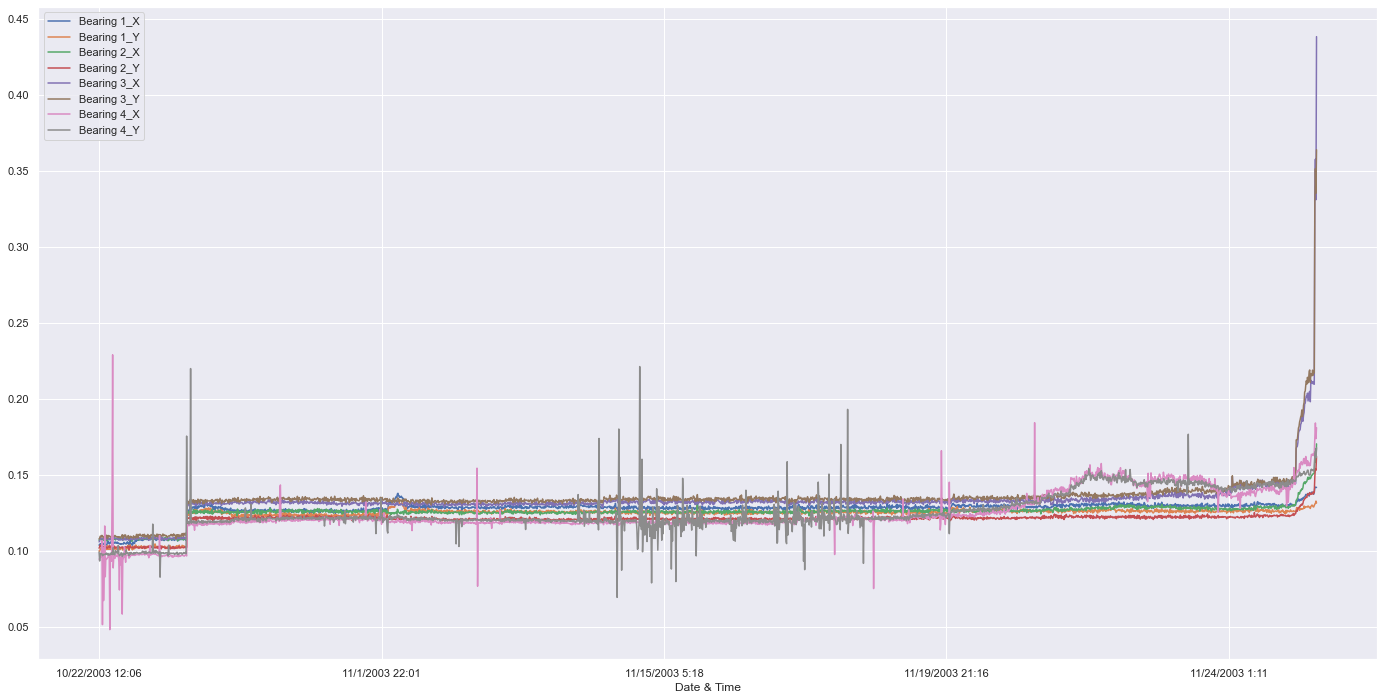

In [ ]:
df_bearing_all_graph = DataFrame(data_from_csv, columns=['Date & Time', 'Bearing 1_X', 'Bearing 1_Y','Bearing 2_X', 'Bearing 2_Y','Bearing 3_X', 'Bearing 3_Y','Bearing 4_X', 'Bearing 4_Y'])
df_bearing_all_graph.plot(x ='Date & Time', figsize = (24,12))

# Bearing 1

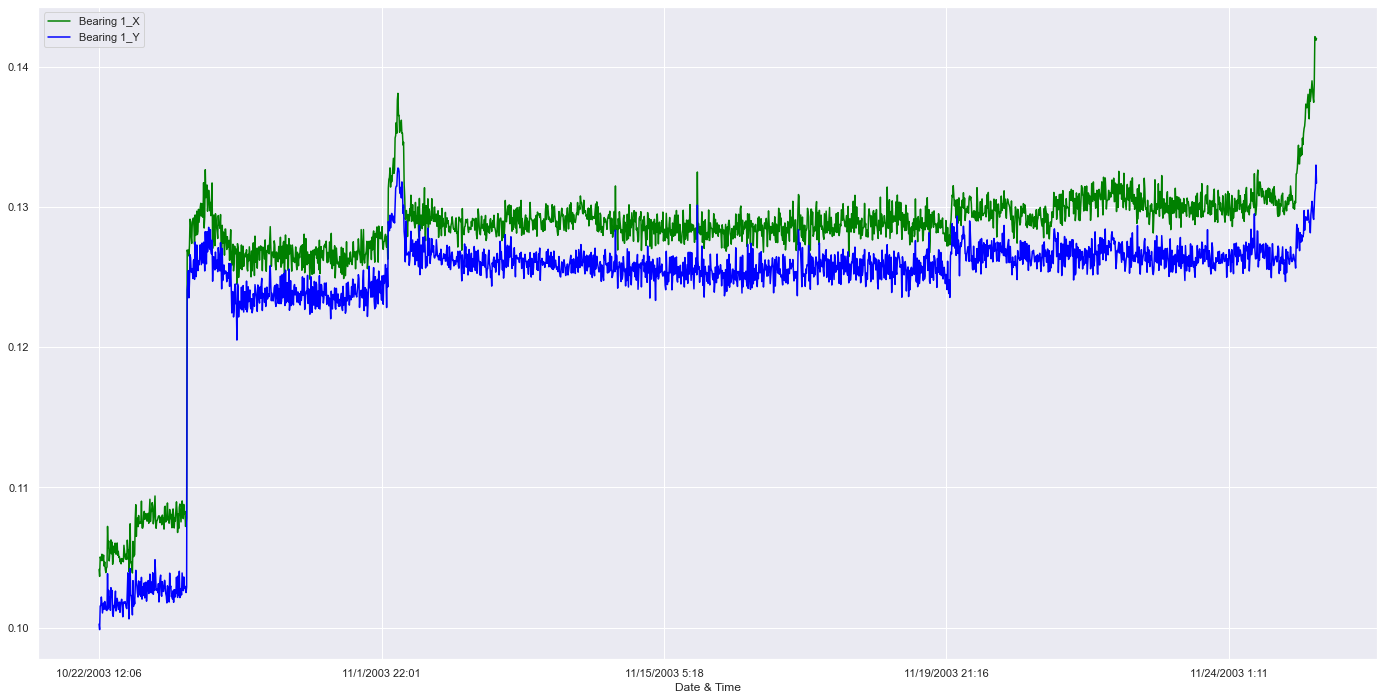

In [ ]:
#bearing 1 data from all csv
df_bearing_1_graph = DataFrame(data_from_csv, columns=['Date & Time', 'Bearing 1_X', 'Bearing 1_Y'])
df_bearing_1_graph.plot(x ='Date & Time', figsize = (24,12), color = ['green','blue'])

# Bearing 2

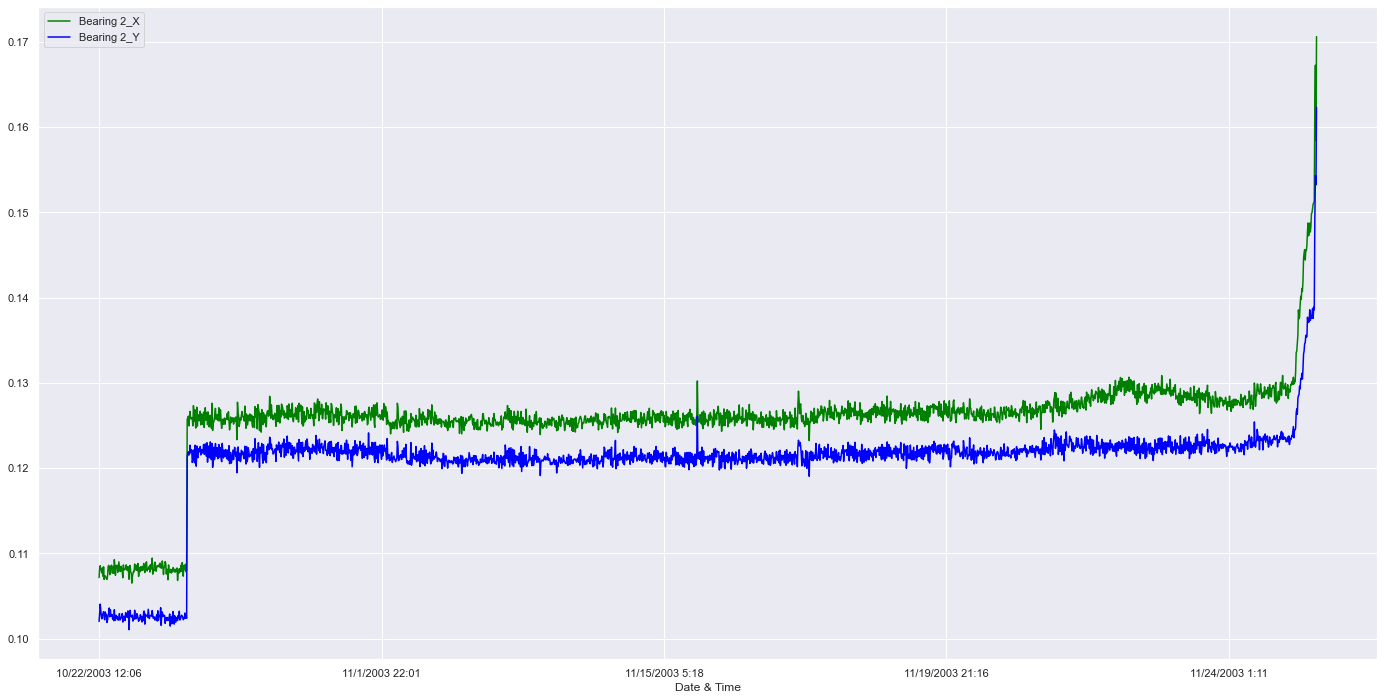

In [ ]:
#bearing 2 data from all csv
df_bearing_2_graph = DataFrame(data_from_csv, columns=['Date & Time', 'Bearing 2_X', 'Bearing 2_Y'])
df_bearing_2_graph.plot(x ='Date & Time', figsize = (24,12), color = ['green','blue'])

# Bearing 3

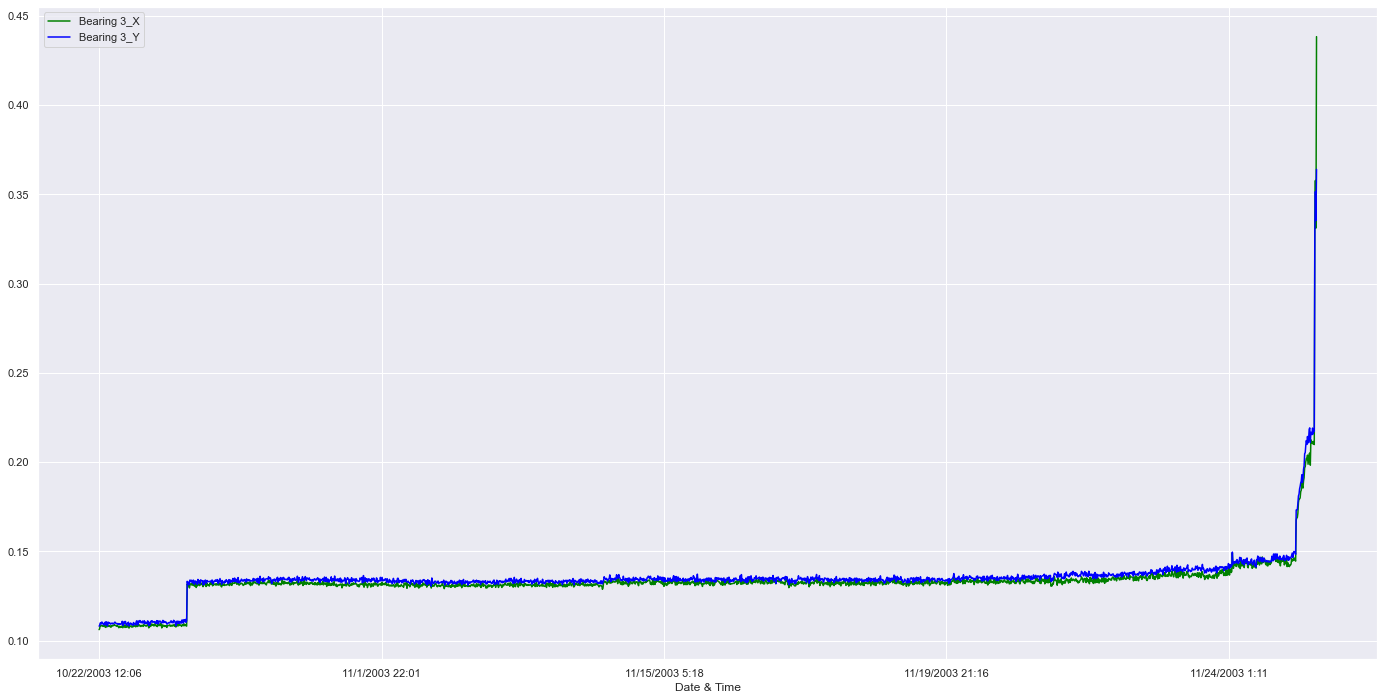

In [ ]:
#bearing 3 data from all csv
df_bearing_3_graph = DataFrame(data_from_csv, columns=['Date & Time', 'Bearing 3_X', 'Bearing 3_Y'])
df_bearing_3_graph.plot(x ='Date & Time', figsize = (24,12), color = ['green','blue'])

# Bearing 4

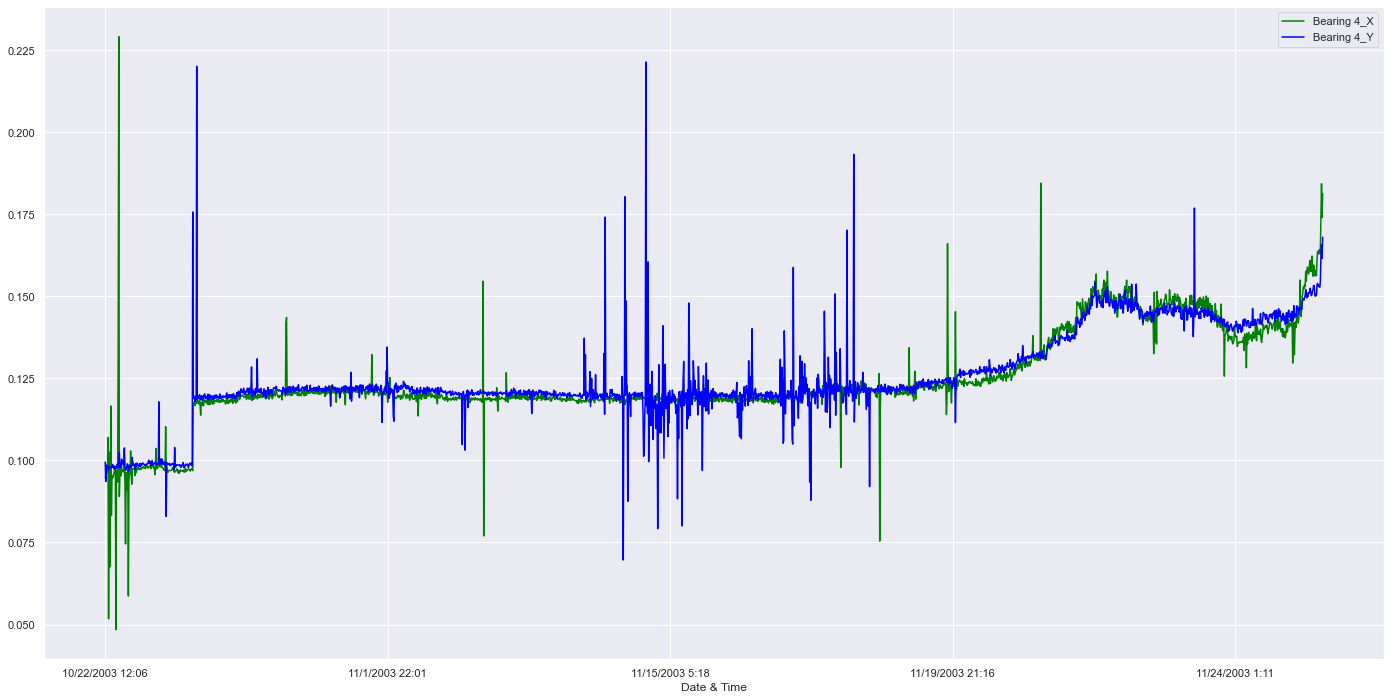

In [ ]:
#bearing 4 data from all csv
df_bearing_4_graph = DataFrame(data_from_csv, columns=['Date & Time', 'Bearing 4_X', 'Bearing 4_Y'])
df_bearing_4_graph.plot(x ='Date & Time', figsize = (24,12), color = ['green','blue'])

# Bearings from dataframe to csv

In [ ]:
#bearing 1 create dataframe file
Date_time_bearing_1 = data_from_csv["Date & Time"]
vibration_bearing_1_X = data_from_csv["Bearing 1_X"]
vibration_bearing_1_Y = data_from_csv["Bearing 1_Y"]
dict = {'Date & Time': Date_time_bearing_1, 'Bearing 1 X axis': vibration_bearing_1_X, 'Bearing 1 Y axis': vibration_bearing_1_Y}
df_bearing_1 = pd.DataFrame(dict)
print("created bearing_1 dataframe")


#bearing 2 create dataframe file
Date_time_bearing_2 = data_from_csv["Date & Time"]
vibration_bearing_2_X = data_from_csv["Bearing 2_X"]
vibration_bearing_2_Y = data_from_csv["Bearing 2_Y"]
dict = {'Date & Time': Date_time_bearing_2, 'Bearing 2 X axis': vibration_bearing_2_X, 'Bearing 2 Y axis': vibration_bearing_2_Y}
df_bearing_2 = pd.DataFrame(dict)
print("created bearing_2 dataframe")


#bearing 3 create dataframe file
Date_time_bearing_3 = data_from_csv["Date & Time"]
vibration_bearing_3_X = data_from_csv["Bearing 3_X"]
vibration_bearing_3_Y = data_from_csv["Bearing 3_Y"]
dict = {'Date & Time': Date_time_bearing_3, 'Bearing 3 X axis': vibration_bearing_3_X, 'Bearing 3 Y axis': vibration_bearing_3_Y}
df_bearing_3 = pd.DataFrame(dict)
print("created bearing_3 dataframe")


#bearing 4 create dataframe file
Date_time_bearing_4 = data_from_csv["Date & Time"]
vibration_bearing_4_X = data_from_csv["Bearing 4_X"]
vibration_bearing_4_Y = data_from_csv["Bearing 4_Y"]
dict = {'Date & Time': Date_time_bearing_4, 'Bearing 4 X axis': vibration_bearing_4_X, 'Bearing 4 Y axis': vibration_bearing_4_Y}
df_bearing_4 = pd.DataFrame(dict)
print("created bearing_4 dataframe")


#convert into csv each
df_bearing_1.to_csv(r'C:\Users\ASUS\Bearing analysis jupyter\FYP\ATLAS samples\Bearing 1 ATLAS data.csv', index = False, header = True)
print("created bearing_1 csv file !!")
df_bearing_2.to_csv(r'C:\Users\ASUS\Bearing analysis jupyter\FYP\ATLAS samples\Bearing 2 ATLAS data.csv', index = False, header = True)
print("created bearing_2 csv file !!")
df_bearing_3.to_csv(r'C:\Users\ASUS\Bearing analysis jupyter\FYP\ATLAS samples\Bearing 3 ATLAS data.csv', index = False, header = True)
print("created bearing_3 csv file !!")
df_bearing_4.to_csv(r'C:\Users\ASUS\Bearing analysis jupyter\FYP\ATLAS samples\Bearing 4 ATLAS data.csv', index = False, header = True)
print("created bearing_4 csv file !!")


created bearing_1 dataframe
created bearing_2 dataframe
created bearing_3 dataframe
created bearing_4 dataframe
created bearing_1 csv file !!
created bearing_2 csv file !!
created bearing_3 csv file !!
created bearing_4 csv file !!


# Select Train & Test by index no

In [ ]:
index_num = int((2/3)*number_of_rows_merged_data)                           #2/3 of data to train   1437
#bearing 1
            #index num selecting
train_b_1_end = index_num
test_b_1_start = train_b_1_end

            #define dataset b 1
train_data_b_1 = df_bearing_1[  : train_b_1_end]
test_data_b_1 = df_bearing_1[ test_b_1_start : ]
print("Bearing 1 test, train data classified")

#bearing 2
            #index num selecting
train_b_2_end = index_num
test_b_2_start = train_b_2_end

            #define dataset b 2
train_data_b_2 = df_bearing_2[  : train_b_2_end]
test_data_b_2 = df_bearing_2[ test_b_2_start : ]
print("Bearing 2 test, train data classified")

#bearing 3
            #index num selecting
train_b_3_end = index_num
test_b_3_start = train_b_3_end

            #define dataset b 1
train_data_b_3 = df_bearing_3[  : train_b_3_end]
test_data_b_3 = df_bearing_3[ test_b_3_start : ]
print("Bearing 3 test, train data classified")

#bearing 4
            #index num selecting
train_b_4_end = index_num
test_b_4_start = train_b_4_end

            #define dataset b 1
train_data_b_4 = df_bearing_4[  : train_b_4_end]
test_data_b_4 = df_bearing_4[ test_b_4_start : ]
print("Bearing 4 test, train data classified")

Bearing 1 test, train data classified
Bearing 2 test, train data classified
Bearing 3 test, train data classified
Bearing 4 test, train data classified


In [ ]:
col_list_train = ["Bearing 1_X", "Bearing 1_Y", "Bearing 2_X", "Bearing 2_Y", "Bearing 3_X", "Bearing 3_Y", "Bearing 4_X", "Bearing 4_Y"]
df_train = pd.read_csv(most_recent, usecols=col_list_train)

train_b_all_end = index_num
test_b_all_start = train_b_1_end

dataset_train_b_all = df_train[ :train_b_all_end]
dataset_test_b_all = df_train[test_b_all_start:]
print("Bearing all test, train data classified")
dataset_train_b_all.head()

Bearing all test, train data classified


,Bearing 1_X,Bearing 1_Y,Bearing 2_X,Bearing 2_Y,Bearing 3_X,Bearing 3_Y,Bearing 4_X,Bearing 4_Y
0,0.104148,0.100253,0.107147,0.102004,0.106149,0.108150,0.094803,0.099513
1,0.103651,0.099854,0.108189,0.102920,0.106661,0.108458,0.095070,0.093587
2,0.105039,0.101543,0.108543,0.104042,0.108740,0.109875,0.096158,0.098299
3,0.104900,0.101573,0.108152,0.103378,0.108068,0.110010,0.096814,0.098602
4,0.104779,0.102181,0.107943,0.102629,0.108454,0.109350,0.096358,0.098471


In [ ]:
dataset_test_b_all.head()

,Bearing 1_X,Bearing 1_Y,Bearing 2_X,Bearing 2_Y,Bearing 3_X,Bearing 3_Y,Bearing 4_X,Bearing 4_Y
1437,0.128434,0.125578,0.126885,0.121640,0.132284,0.135108,0.123061,0.122793
1438,0.128577,0.125696,0.126330,0.120965,0.133077,0.134697,0.121705,0.122566
1439,0.127497,0.125105,0.126129,0.122020,0.132355,0.135089,0.122385,0.122108
1440,0.128858,0.125602,0.126435,0.120981,0.131664,0.134150,0.123454,0.124053
1441,0.128380,0.125245,0.126084,0.121655,0.131317,0.132599,0.122143,0.123188


In [ ]:
#get Date & time from test datasets
col_list_test_date = ["Date & Time"]
df_test_date = pd.read_csv(most_recent, usecols=col_list_test_date)
dataset_test_date_time = df_test_date[test_b_all_start:]
dataset_test_date_time = pd.to_datetime(dataset_test_date_time.stack()).unstack()
dataset_test_date_time.head()

,Date & Time
1437,2003-11-19 09:22:00
1438,2003-11-19 11:04:00
1439,2003-11-19 11:06:00
1440,2003-11-19 11:16:00
1441,2003-11-19 11:26:00


In [ ]:
#get Date & time from train datasets
col_list_train_date = ["Date & Time"]
df_train_date = pd.read_csv(most_recent, usecols=col_list_train_date)
dataset_train_date_time = df_train_date[:train_b_all_end]
dataset_train_date_time = pd.to_datetime(dataset_train_date_time.stack()).unstack()
dataset_train_date_time.head()

,Date & Time
0,2003-10-22 12:06:00
1,2003-10-22 12:09:00
2,2003-10-22 12:14:00
3,2003-10-22 12:19:00
4,2003-10-22 12:24:00


# Preprocess data

In [ ]:
scaler = preprocessing.MinMaxScaler()

#bearing  train
train_data_b_all_scaled = pd.DataFrame(scaler.fit_transform(dataset_train_b_all),
                                       columns=dataset_train_b_all.columns,
                                       index=dataset_train_b_all.index)

#bearing  test
test_data_b_all_scaled = pd.DataFrame(scaler.fit_transform(dataset_test_b_all),
                                       columns=dataset_test_b_all.columns,
                                       index=dataset_test_b_all.index)

#Random shuffle training data
train_data_b_all_scaled.sample(frac=1)


,Bearing 1_X,Bearing 1_Y,Bearing 2_X,Bearing 2_Y,Bearing 3_X,Bearing 3_Y,Bearing 4_X,Bearing 4_Y
923,0.725101,0.766715,0.800126,0.794973,0.869446,0.887367,0.385109,0.352868
773,0.744518,0.802130,0.805942,0.800579,0.870484,0.857957,0.390029,0.331675
932,0.714186,0.744637,0.813234,0.811599,0.936076,0.917559,0.391348,0.330980
86,0.126822,0.089788,0.072251,0.058192,0.101604,0.100281,0.272169,0.193562
1174,0.727060,0.792982,0.769894,0.779235,0.889911,0.889206,0.382289,0.327183
...,...,...,...,...,...,...,...,...
1238,0.790529,0.866068,0.949606,0.887004,0.915174,0.968628,0.415522,0.394226
1099,0.718095,0.778592,0.806891,0.808228,0.899215,0.907054,0.385902,0.329363
547,0.749116,0.813813,0.787116,0.775018,0.842178,0.865813,0.388875,0.333132
1182,0.718323,0.765797,0.780272,0.791202,0.901127,0.922450,0.384045,0.325726


# PCA  configuration

In [ ]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2, svd_solver= 'full')
X_train_PCA = pca.fit_transform(np.array(train_data_b_all_scaled))
X_train_PCA = pd.DataFrame(X_train_PCA)
X_train_PCA.index = train_data_b_all_scaled.index

X_test_PCA = pca.transform(np.array(test_data_b_all_scaled))
X_test_PCA = pd.DataFrame(X_test_PCA)
X_test_PCA.index = test_data_b_all_scaled.index

# Defining functions related with PCA

# Calculate the covariance matrix

In [ ]:
def cov_matrix(data, verbose=False):
    covariance_matrix = np.cov(data, rowvar=False)
    if is_pos_def(covariance_matrix):
        inv_covariance_matrix = np.linalg.inv(covariance_matrix)
        if is_pos_def(inv_covariance_matrix):
            return covariance_matrix, inv_covariance_matrix
        else:
            print("Error: Inverse of Covariance Matrix is not positive definite!")
    else:
        print("Error: Covariance Matrix is not positive definite!")

# Calculate the Mahalanobis distance

In [ ]:
def Mahalanobis_Dist(inv_cov_matrix, mean_distr, data, verbose=False):
    inv_covariance_matrix = inv_cov_matrix
    vars_mean = mean_distr
    diff = data - vars_mean
    md = []
    for i in range(len(diff)):
        md.append(np.sqrt(diff[i].dot(inv_covariance_matrix).dot(diff[i])))
    return md

# Detecting Mahalanobis distance outliers

In [ ]:
def MD_detect_Outliers(dist, extreme=False, verbose=False):
    k = 3. if extreme else 2.
    threshold = np.mean(dist) * k
    outliers = []
    for i in range(len(dist)):
        if dist[i] >= threshold:
            outliers.append(i)
    return np.array(outliers)

# Threshold value calculation

In [ ]:
def MD_threshold(dist, extreme=False, verbose=False):
    k = 3. if extreme else 2.
    threshold = np.mean(dist) * k
    return threshold

# Check if matrix is positive definite

In [ ]:
def is_pos_def(A):
    if np.allclose(A, A.T):
        try:
            np.linalg.cholesky(A)
            return True
        except np.linalg.LinAlgError:
            return False
    else:
        return False

# Define train/test set

In [ ]:
data_train = np.array(X_train_PCA.values)
data_test = np.array(X_test_PCA.values)

# Calculate the covariance matrix and its inverse

In [ ]:
cov_matrix, inv_cov_matrix  = cov_matrix(data_train)

# Mahalanobis distance to datapoints

In [ ]:
mean_distr = data_train.mean(axis=0)

In [ ]:
dist_test = Mahalanobis_Dist(inv_cov_matrix, mean_distr, data_test, verbose=True)
dist_train = Mahalanobis_Dist(inv_cov_matrix, mean_distr, data_train, verbose=True)
threshold = MD_threshold(dist_train, extreme = True)

# Threshold value for flagging an anomaly

(0.0, 15.0)

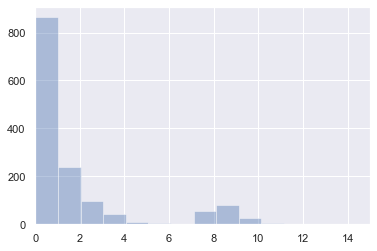

In [ ]:
plt.figure()
sns.distplot(np.square(dist_train),
             bins = 29,
             kde= False);
plt.rcParams["figure.figsize"] = (24, 12)
plt.xlim([0.0,15])

# Visualize the Mahalanobis distance

Text(0.5, 0, 'Mahalanobis dist')

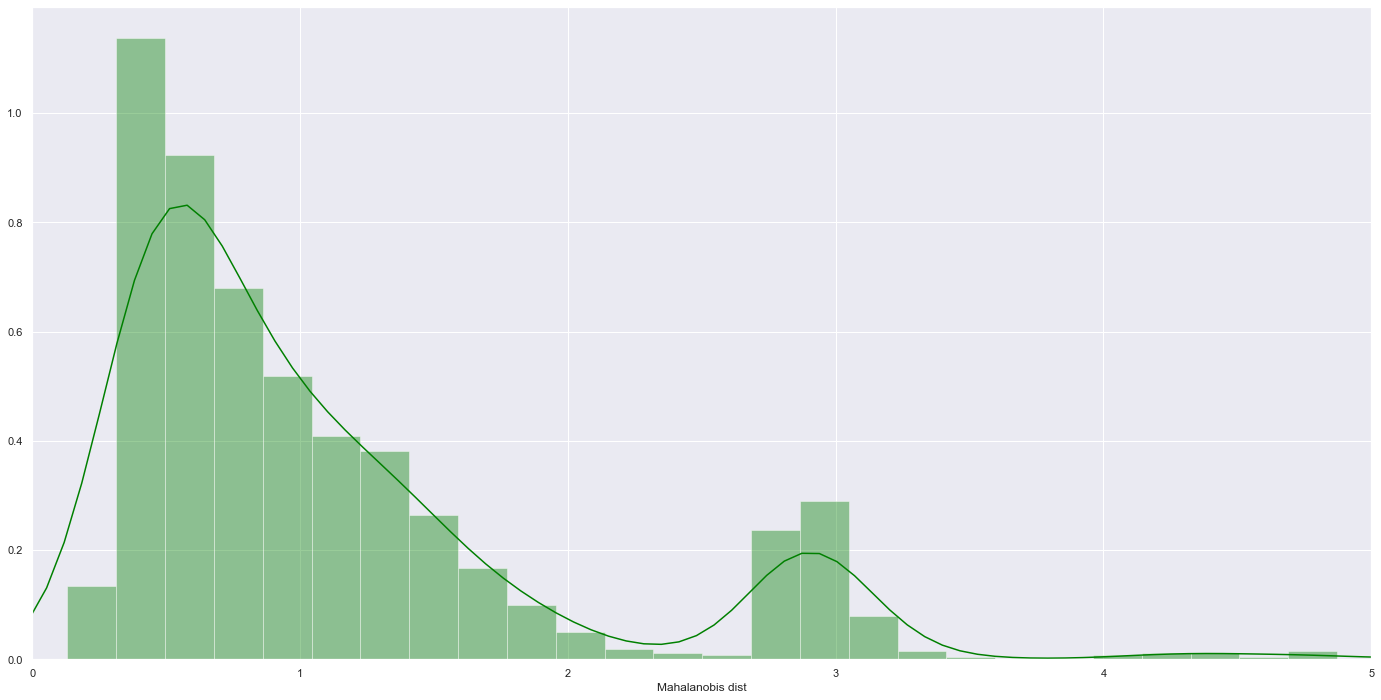

In [ ]:
plt.figure()
sns.distplot(dist_train,
             bins = 29,
             kde= True,
            color = 'green');
plt.xlim([0.0,5])
plt.rcParams["figure.figsize"] = (24, 12)
plt.xlabel('Mahalanobis dist')

# Flag the anomaly

In [ ]:
anomaly_train = pd.DataFrame()
anomaly_train['Mob dist']= dist_train
anomaly_train['Thresh'] = threshold
anomaly_train['Anomaly'] = anomaly_train['Mob dist'] > anomaly_train['Thresh']
anomaly_train.index = X_train_PCA.index
anomaly = pd.DataFrame()
anomaly['Mob dist']= dist_test
anomaly['Thresh'] = threshold

anomaly['Anomaly'] = anomaly['Mob dist'] > anomaly['Thresh']
anomaly.index = X_test_PCA.index

In [ ]:
anomaly.head()

,Mob dist,Thresh,Anomaly
1437,3.884466,3.366935,True
1438,4.139639,3.366935,True
1439,3.301553,3.366935,False
1440,4.194975,3.366935,True
1441,3.754678,3.366935,True


In [ ]:
anom_train_processed = anomaly_train
anom_train_processed['Date & Time']  = dataset_train_date_time
anom_train_processed = anom_train_processed[['Date & Time', 'Mob dist', 'Thresh', 'Anomaly']]
anom_train_processed.head()

,Date & Time,Mob dist,Thresh,Anomaly
0,2003-10-22 12:06:00,3.138008,3.366935,False
1,2003-10-22 12:09:00,3.283228,3.366935,False
2,2003-10-22 12:14:00,3.056239,3.366935,False
3,2003-10-22 12:19:00,3.025401,3.366935,False
4,2003-10-22 12:24:00,2.960883,3.366935,False


In [ ]:
anom_test_processed = anomaly
anom_test_processed['Date & Time']  = dataset_test_date_time
anom_test_processed = anom_test_processed[['Date & Time', 'Mob dist', 'Thresh', 'Anomaly']]
anom_test_processed.head()

,Date & Time,Mob dist,Thresh,Anomaly
1437,2003-11-19 09:22:00,3.884466,3.366935,True
1438,2003-11-19 11:04:00,4.139639,3.366935,True
1439,2003-11-19 11:06:00,3.301553,3.366935,False
1440,2003-11-19 11:16:00,4.194975,3.366935,True
1441,2003-11-19 11:26:00,3.754678,3.366935,True


In [ ]:
anomaly_alldata = pd.concat([anomaly_train, anomaly])
anomaly_alldata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2156 entries, 0 to 2155
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   Mob dist     2156 non-null   float64       
 1   Thresh       2156 non-null   float64       
 2   Anomaly      2156 non-null   bool          
 3   Date & Time  2156 non-null   datetime64[ns]
dtypes: bool(1), datetime64[ns](1), float64(2)
memory usage: 52.8 KB


In [ ]:
anomaly_alldata.to_csv(r'C:\Users\ASUS\Bearing analysis jupyter\FYP\ATLAS anomaly\Anomaly_distance.csv', index = False, header = True)

# Verifying PCA model on test data

In [ ]:
anom_alldata_datastamp = pd.concat([anom_train_processed,anom_test_processed])
anom_alldata_datastamp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2156 entries, 0 to 2155
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   Date & Time  2156 non-null   datetime64[ns]
 1   Mob dist     2156 non-null   float64       
 2   Thresh       2156 non-null   float64       
 3   Anomaly      2156 non-null   bool          
dtypes: bool(1), datetime64[ns](1), float64(2)
memory usage: 52.8 KB


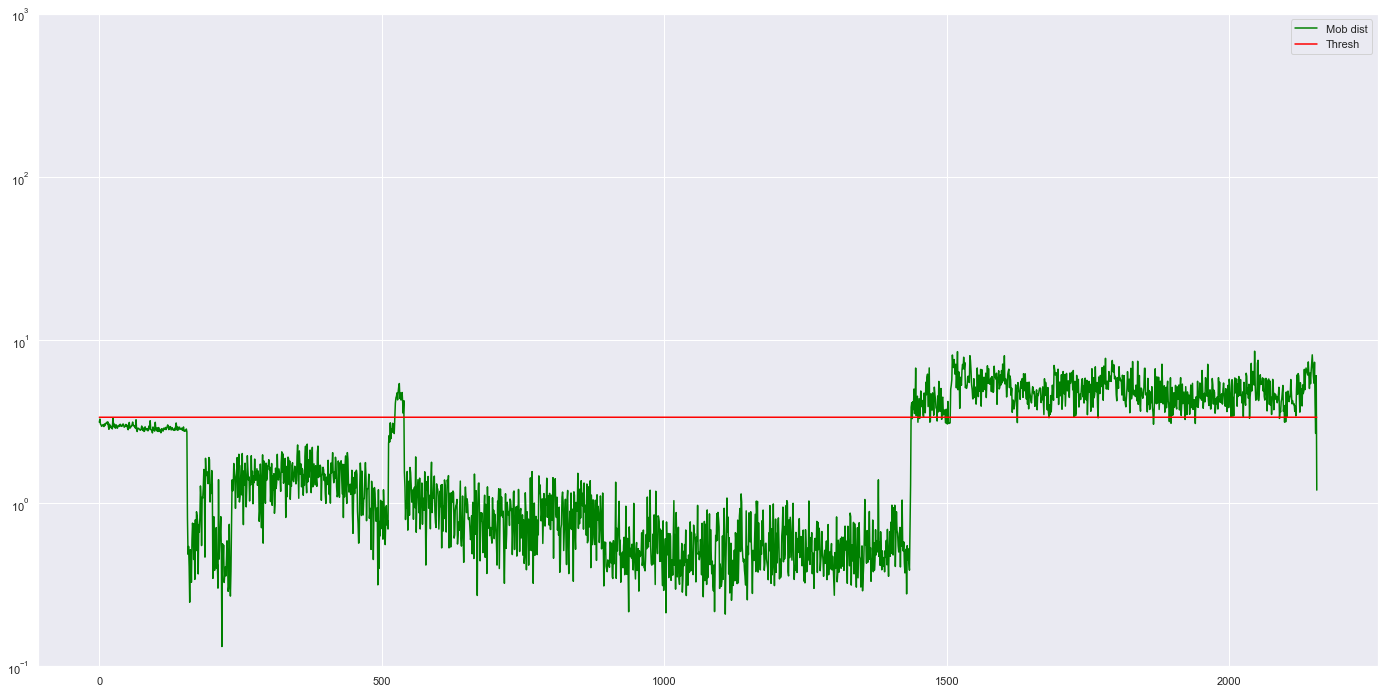

In [ ]:
df_anomaly_alldata = DataFrame(anomaly_alldata, columns=['Mob dist', 'Thresh'])
df_anomaly_alldata.plot(logy=True, figsize = (24,12), ylim = [1e-1,1e3], color = ['green','red'])

# Raw Flag

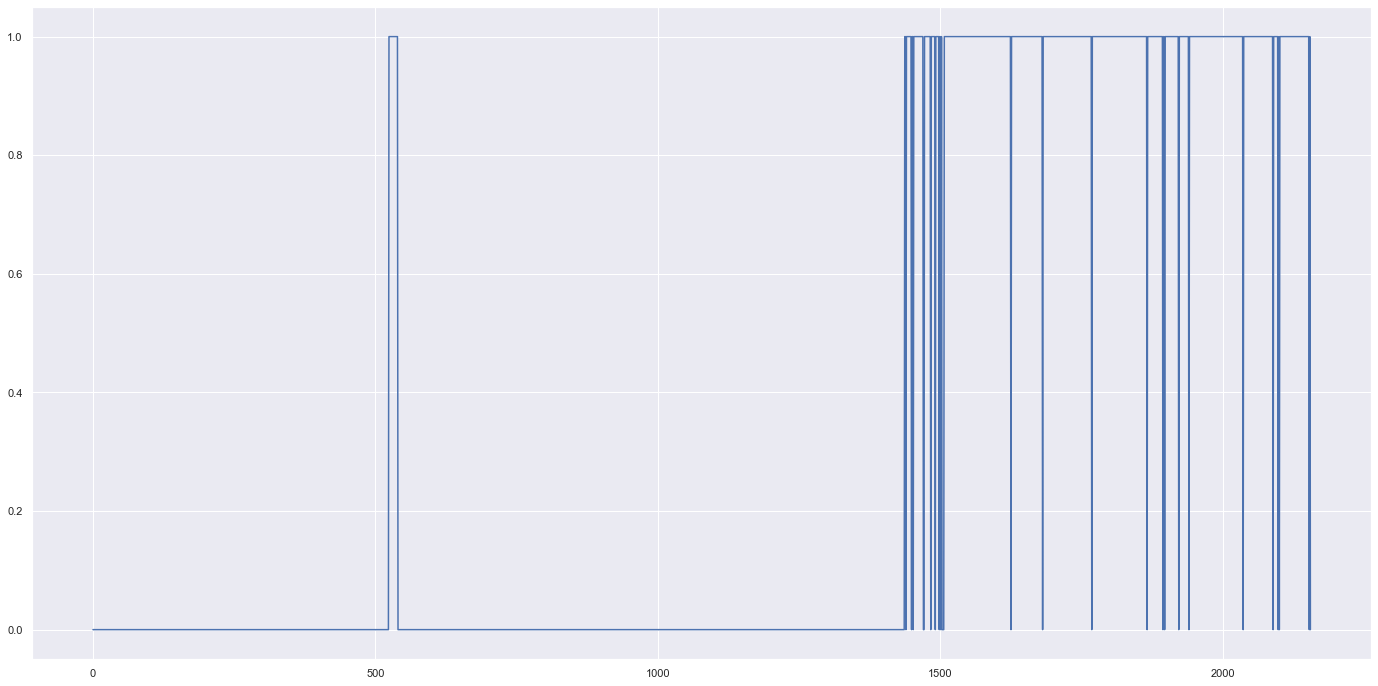

In [ ]:
x_flag = anomaly_alldata.index
y_flag = anomaly_alldata["Anomaly"]
plt.rcParams["figure.figsize"] = (24, 12)
plt.plot(x_flag, y_flag)

# Smoothing

In [ ]:
#Smoothing by exponentially weighted window functions and calculate the exponentially weighted average
com_val = 4.5
smooth_anomaly_mob_dis = anom_alldata_datastamp["Mob dist"].ewm(com= com_val).mean()
smooth_anomaly_thresh = anom_alldata_datastamp["Thresh"]
smooth_anomaly_anomal_val = smooth_anomaly_mob_dis > smooth_anomaly_thresh
smooth_anomaly_date_time = anom_alldata_datastamp["Date & Time"]
smooth_anomaly_time_stamp = pd.to_datetime(smooth_anomaly_date_time)
smooth_anomaly_dataframe = pd.DataFrame()
anomaly_frame_layout = {
                        "Date & Time" : smooth_anomaly_time_stamp,
                        "Thresh" : smooth_anomaly_thresh,
                        "Mob dist" : smooth_anomaly_mob_dis,
                        "Anomaly" : smooth_anomaly_anomal_val
                        }
smooth_anomaly_dataframe = pd.concat(anomaly_frame_layout, axis = 1)
smooth_anomaly_dataframe.set_index('Date & Time')
smooth_anomaly_dataframe.to_csv(r'C:\Users\ASUS\Bearing analysis jupyter\FYP\ATLAS anomaly\Anomaly_distance_smoothed.csv', index = False, header = True)

In [ ]:
smooth_anomaly_dataframe.head()

,Date & Time,Thresh,Mob dist,Anomaly
0,2003-10-22 12:06:00,3.366935,3.138008,False
1,2003-10-22 12:09:00,3.366935,3.217879,False
2,2003-10-22 12:14:00,3.366935,3.152901,False
3,2003-10-22 12:19:00,3.366935,3.110895,False
4,2003-10-22 12:24:00,3.366935,3.067831,False


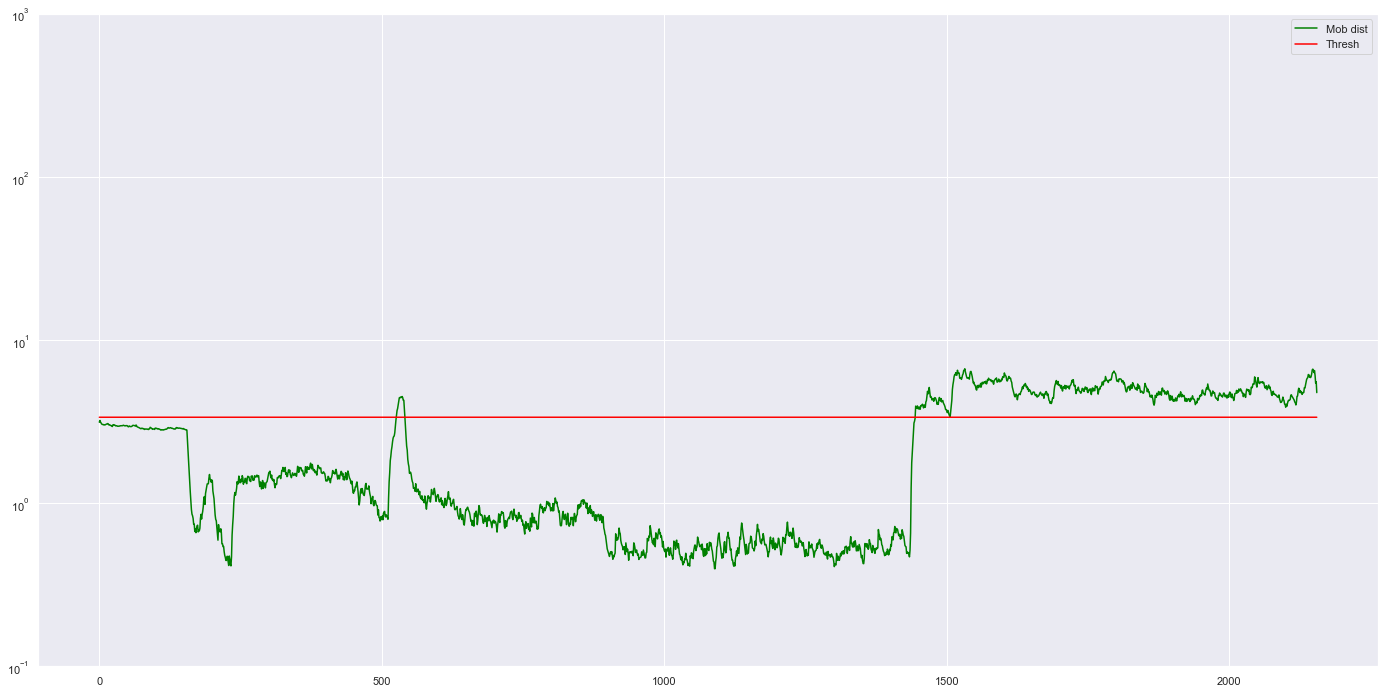

In [ ]:
df_smooth = DataFrame(smooth_anomaly_dataframe, columns=['Mob dist', 'Thresh'])
df_smooth.plot(logy=True, figsize = (24,12), ylim = [1e-1,1e3], color = ['green','red'])

# Smoothed flag

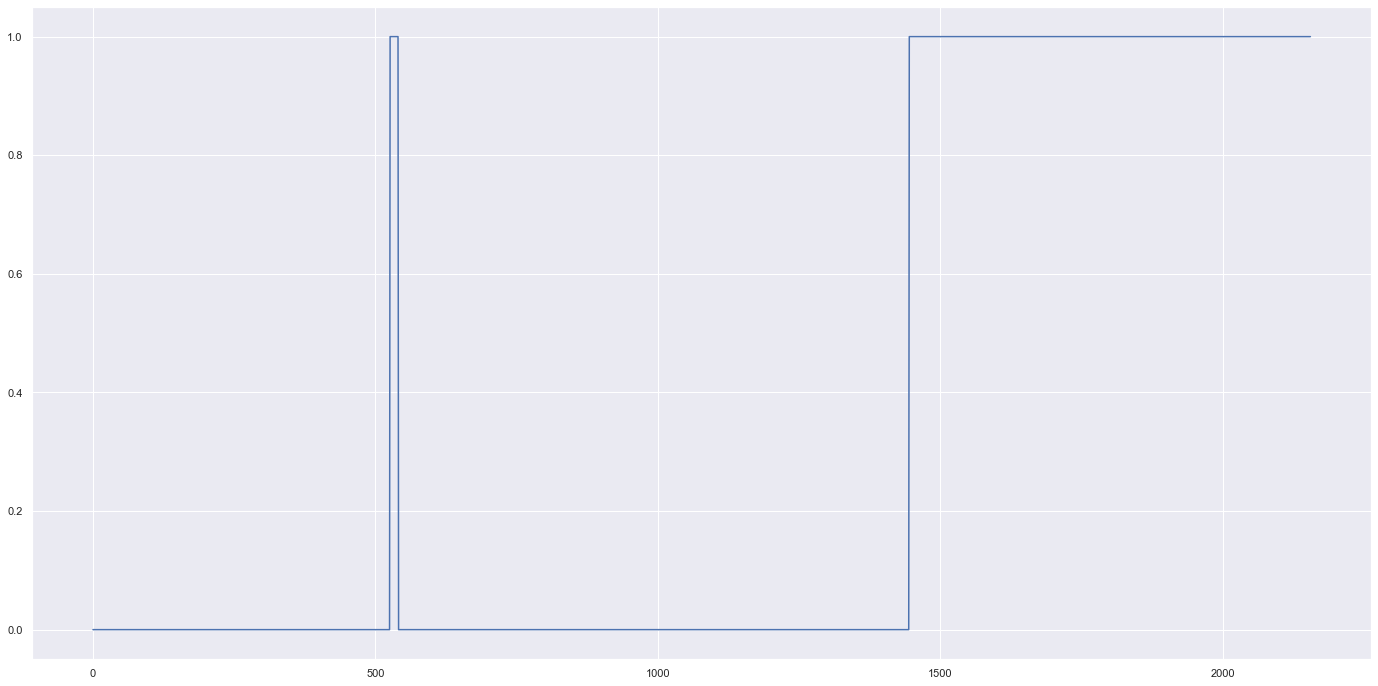

In [ ]:
x_df_smooth_flag = smooth_anomaly_dataframe.index
y_df_smooth_flag = smooth_anomaly_dataframe['Anomaly']
plt.rcParams["figure.figsize"] = (24, 12)
plt.plot(x_df_smooth_flag, y_df_smooth_flag)

In [ ]:
visualize_flag_time = data_from_csv['Date & Time']
visualize_flag_anomaly = smooth_anomaly_dataframe['Anomaly'].astype(int)
dict = {'Date & Time': visualize_flag_time, 'Anomaly': visualize_flag_anomaly}
visualize_flag = pd.DataFrame(dict)
visualize_flag.head()

,Date & Time,Anomaly
0,10/22/2003 12:06,0
1,10/22/2003 12:09,0
2,10/22/2003 12:14,0
3,10/22/2003 12:19,0
4,10/22/2003 12:24,0


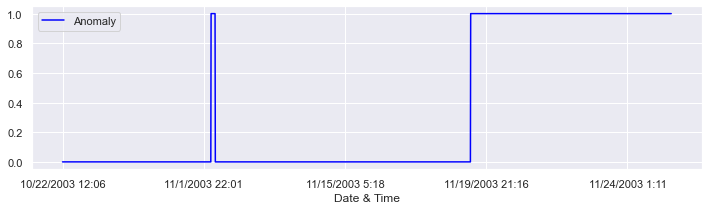

In [ ]:
visualize_flag.plot(x ='Date & Time', figsize = (12,3), color = ['blue'])

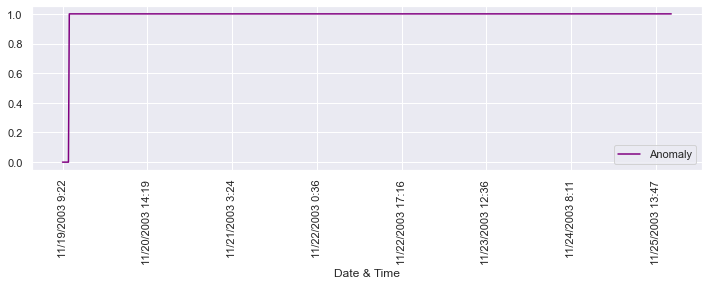

In [ ]:
visualize_test = visualize_flag[test_b_all_start :]
visualize_test.plot(x ='Date & Time', figsize = (12,3), color = ['purple'], rot = 90)

In [ ]:
visualize_test_txt = smooth_anomaly_dataframe[test_b_all_start :]
visualize_test_txt

,Date & Time,Thresh,Mob dist,Anomaly
1437,2003-11-19 09:22:00,3.366935,1.242654,False
1438,2003-11-19 11:04:00,3.366935,1.769379,False
1439,2003-11-19 11:06:00,3.366935,2.047956,False
1440,2003-11-19 11:16:00,3.366935,2.438323,False
1441,2003-11-19 11:26:00,3.366935,2.677660,False
...,...,...,...,...
2151,2003-11-25 16:07:00,3.366935,6.506931,True
2152,2003-11-25 23:13:00,3.366935,6.065012,True
2153,2003-11-25 23:19:00,3.366935,5.449331,True
2154,2003-11-25 23:29:00,3.366935,5.559488,True


# Filter Rising and Falling edges

In [ ]:
edge_detected_anomaly = visualize_test_txt[visualize_test_txt.Anomaly.diff().fillna(False)]
edge_detected_anomaly

,Date & Time,Thresh,Mob dist,Anomaly
1445,2003-11-19 12:06:00,3.366935,3.93903,True


In [ ]:
rising_data = pd.DataFrame()
falling_data = pd.DataFrame()

rising_data = edge_detected_anomaly[edge_detected_anomaly['Anomaly']]
rising_data_df = DataFrame(rising_data)
len_rising = len(rising_data_df)
rising_data_df

,Date & Time,Thresh,Mob dist,Anomaly
1445,2003-11-19 12:06:00,3.366935,3.93903,True


In [ ]:
falling_data = edge_detected_anomaly[~edge_detected_anomaly['Anomaly']]
falling_data_df = DataFrame(falling_data)
len_falling = len(falling_data_df)
falling_data_df

,Date & Time,Thresh,Mob dist,Anomaly


In [ ]:
last_day_rising = rising_data_df['Date & Time'].max()
last_day_max_falling = falling_data_df['Date & Time'].max()
last_day_test = visualize_test_txt['Date & Time'].max()
print("Rising latest point = " + str(last_day_rising))
if last_day_max_falling > last_day_rising:
    print("Falling latest point = " + str(last_day_max_falling))
    last_day_falling = last_day_max_falling
else:
    print("Only rising!!")
    last_day_falling = last_day_test

Rising latest point = 2003-11-19 12:06:00
Only rising!!


In [ ]:
if len_falling == 0 and len_rising == 1:
    print("There is only rising....")
    rising_only_datetime = last_day_rising
    time_duartion = last_day_falling - rising_only_datetime
    print("Time duration : "+ str(time_duartion))
elif len_falling > 0 and len_rising >= 1:
    print("There is flagging periods...")
    time_duartion = last_day_falling - last_day_rising
    print("Time duration : "+ str(time_duartion))
time_duration_hrs = time_duartion / np.timedelta64(1, 'h')
print(time_duration_hrs)

There is only rising....
Time duration : 6 days 11:33:00
155.55


In [ ]:
#convert dates into str name type
last_day_rising_file = last_day_rising.strftime('%m/%d/%Y %H:%M:%S')
last_day_rising_file  = last_day_rising_file [:-3]
last_day_falling_file = last_day_falling.strftime('%m/%d/%Y %H:%M:%S')
last_day_falling_file  = last_day_falling_file [:-3]

In [ ]:
last_day_rising_file

'11/19/2003 12:06'

In [ ]:
last_day_falling_file

'11/25/2003 23:39'

In [ ]:
visualize_test

,Date & Time,Anomaly
1437,11/19/2003 9:22,0
1438,11/19/2003 11:04,0
1439,11/19/2003 11:06,0
1440,11/19/2003 11:16,0
1441,11/19/2003 11:26,0
...,...,...
2151,11/25/2003 16:07,1
2152,11/25/2003 23:13,1
2153,11/25/2003 23:19,1
2154,11/25/2003 23:29,1


In [ ]:
#get index of selected rising and falling data
rising_index = int(visualize_test[visualize_test['Date & Time'] == last_day_rising_file].index.values)
print(rising_index)

1445


In [ ]:
falling_index = int(visualize_test[visualize_test['Date & Time'] == last_day_falling_file].index.values)
print(falling_index)   #plus 1

2155


# Get all time series data of testing period

In [ ]:
#select file range
data_dir = '1st_test'
list_files = os.listdir(data_dir)
all_files_df = pd.DataFrame(list_files)
all_files_df.columns = ['Date & Time']
all_files_df


,Date & Time
0,2003.10.22.12.06.24
1,2003.10.22.12.09.13
2,2003.10.22.12.14.13
3,2003.10.22.12.19.13
4,2003.10.22.12.24.13
...,...
2151,2003.11.25.16.07.32
2152,2003.11.25.23.13.21
2153,2003.11.25.23.19.56
2154,2003.11.25.23.29.56


In [ ]:
#consider 2h data of flagging in analysis
num_hrs = 1.5
num_of_data = int((60*num_hrs) / 10)
end_index = rising_index + num_of_data
flagged_data_filenames = all_files_df[rising_index : end_index+1]
print(len(flagged_data_filenames))

10


In [ ]:
flagged_data_filenames_list = flagged_data_filenames.values.tolist()
flagged_data_filenames_list = [i[0] for i in flagged_data_filenames_list]

In [ ]:
flag_data_timeseries = pd.DataFrame(columns = ['Bearing 1_X','Bearing 1_Y','Bearing 2_X','Bearing 2_Y', 'Bearing 3_X','Bearing 3_Y','Bearing 4_X','Bearing 4_Y'])
data_dir = '1st_test'


for filename in flagged_data_filenames_list:
    print(filename)
    dataset_ts = pd.read_csv(os.path.join(data_dir, filename), sep='\t')
    #col = list(dataset_ts.columns)
    #head_frm_dataset = pd.DataFrame(np.array(col).reshape(-1,len(col)))
    ts_ds = [dataset_ts]
    for df in ts_ds:
        df.columns = ['Bearing 1_X','Bearing 1_Y','Bearing 2_X','Bearing 2_Y', 'Bearing 3_X','Bearing 3_Y','Bearing 4_X','Bearing 4_Y' ]
    dataset_ts_top = pd.concat(ts_ds).reset_index(drop=True)

    flag_data_timeseries = flag_data_timeseries.append(dataset_ts_top).reset_index(drop=True)





2003.11.19.12.06.07
2003.11.19.12.16.07
2003.11.19.12.26.07
2003.11.19.12.36.07
2003.11.19.12.46.07
2003.11.19.12.56.07
2003.11.19.13.06.07
2003.11.19.13.16.07
2003.11.19.13.26.07
2003.11.19.13.36.07


In [ ]:
#44152724 rows × 8 columns all

In [ ]:
dataset_ts_top

,Bearing 1_X,Bearing 1_Y,Bearing 2_X,Bearing 2_Y,Bearing 3_X,Bearing 3_Y,Bearing 4_X,Bearing 4_Y
0,-0.122,-0.173,-0.046,-0.144,-0.168,-0.298,-0.178,-0.054
1,-0.129,-0.088,0.007,-0.032,-0.198,-0.103,-0.110,-0.117
2,-0.200,-0.166,-0.032,-0.100,-0.085,-0.098,-0.229,-0.149
3,-0.066,-0.171,-0.166,-0.122,-0.144,-0.259,-0.278,-0.122
4,-0.110,-0.039,-0.110,-0.117,-0.295,-0.183,-0.254,-0.161
...,...,...,...,...,...,...,...,...
20474,-0.078,-0.166,-0.142,-0.134,-0.161,-0.146,-0.085,-0.225
20475,-0.129,-0.171,-0.042,-0.127,-0.303,-0.081,-0.066,-0.186
20476,0.022,-0.100,-0.068,-0.127,-0.171,0.059,-0.120,-0.046
20477,0.027,-0.122,-0.125,-0.032,-0.093,-0.234,-0.166,-0.239


In [ ]:
flag_data_timeseries

,Bearing 1_X,Bearing 1_Y,Bearing 2_X,Bearing 2_Y,Bearing 3_X,Bearing 3_Y,Bearing 4_X,Bearing 4_Y
0,-0.222,-0.098,-0.024,-0.134,-0.134,-0.090,-0.193,-0.063
1,-0.002,-0.073,-0.183,-0.171,-0.239,-0.129,-0.210,-0.215
2,0.120,-0.286,-0.276,-0.054,-0.190,0.054,-0.083,-0.269
3,0.144,-0.217,-0.251,-0.024,-0.073,-0.173,-0.071,-0.195
4,-0.005,-0.168,-0.093,-0.098,-0.112,-0.098,-0.085,-0.112
...,...,...,...,...,...,...,...,...
204785,-0.078,-0.166,-0.142,-0.134,-0.161,-0.146,-0.085,-0.225
204786,-0.129,-0.171,-0.042,-0.127,-0.303,-0.081,-0.066,-0.186
204787,0.022,-0.100,-0.068,-0.127,-0.171,0.059,-0.120,-0.046
204788,0.027,-0.122,-0.125,-0.032,-0.093,-0.234,-0.166,-0.239


# Seperate timeseries data based on bearings

In [ ]:
#bearing 1
y_plot_bearing_1_X_ts = flag_data_timeseries["Bearing 1_X"]
y_plot_bearing_1_Y_ts = flag_data_timeseries["Bearing 1_Y"]
x_plot_bearing_1_ts = flag_data_timeseries.index
b1_ts = { 'Bearing 1_X': y_plot_bearing_1_X_ts, 'Bearing 1_Y': y_plot_bearing_1_Y_ts }
b1_ts = pd.DataFrame(b1_ts)

#bearing 2
y_plot_bearing_2_X_ts = flag_data_timeseries["Bearing 2_X"]
y_plot_bearing_2_Y_ts = flag_data_timeseries["Bearing 2_Y"]
x_plot_bearing_2_ts = flag_data_timeseries.index
b2_ts = { 'Bearing 2_X': y_plot_bearing_2_X_ts, 'Bearing 2_Y': y_plot_bearing_2_Y_ts }
b2_ts = pd.DataFrame(b2_ts)

#bearing 3
y_plot_bearing_3_X_ts = flag_data_timeseries["Bearing 3_X"]
y_plot_bearing_3_Y_ts = flag_data_timeseries["Bearing 3_Y"]
x_plot_bearing_3_ts = flag_data_timeseries.index
b3_ts = { 'Bearing 3_X': y_plot_bearing_3_X_ts, 'Bearing 3_Y': y_plot_bearing_3_Y_ts }
b3_ts = pd.DataFrame(b3_ts)

#bearing 4
y_plot_bearing_4_X_ts = flag_data_timeseries["Bearing 4_X"]
y_plot_bearing_4_Y_ts = flag_data_timeseries["Bearing 4_Y"]
x_plot_bearing_4_ts = flag_data_timeseries.index
b4_ts = { 'Bearing 4_X': y_plot_bearing_4_X_ts, 'Bearing 4_Y': y_plot_bearing_4_Y_ts }
b4_ts = pd.DataFrame(b4_ts)

b1_ts['Bearing 1_X'] = pd.to_numeric(b1_ts['Bearing 1_X'], downcast="float")
b1_ts['Bearing 1_Y'] = pd.to_numeric(b1_ts['Bearing 1_Y'], downcast="float")

b2_ts['Bearing 2_X'] = pd.to_numeric(b2_ts['Bearing 2_X'], downcast="float")
b2_ts['Bearing 2_Y'] = pd.to_numeric(b2_ts['Bearing 2_Y'], downcast="float")

b3_ts['Bearing 3_X'] = pd.to_numeric(b3_ts['Bearing 3_X'], downcast="float")
b3_ts['Bearing 3_Y'] = pd.to_numeric(b3_ts['Bearing 3_Y'], downcast="float")

b4_ts['Bearing 4_X'] = pd.to_numeric(b4_ts['Bearing 4_X'], downcast="float")
b4_ts['Bearing 4_Y'] = pd.to_numeric(b4_ts['Bearing 4_Y'], downcast="float")

# Bearing 1

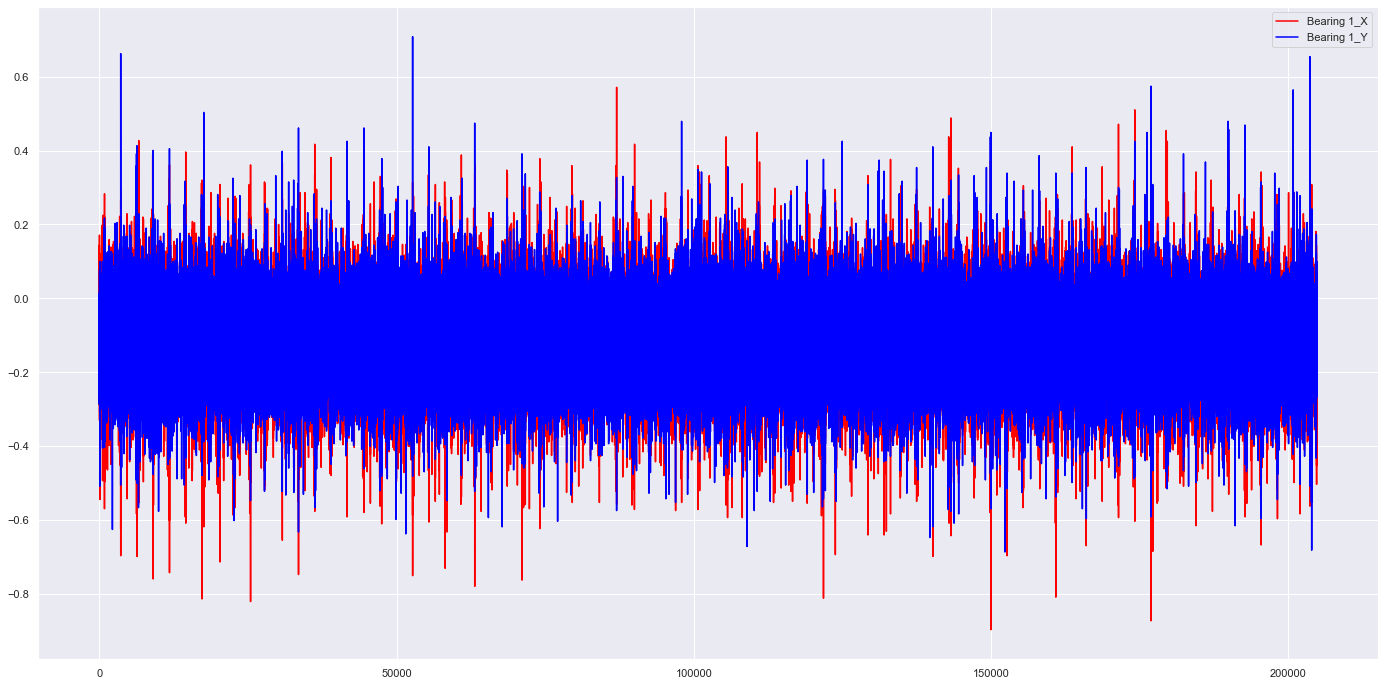

In [ ]:
#bearing 1
b1_ts.plot(figsize = (24,12), color = ['red','blue'])

# Bearing 2

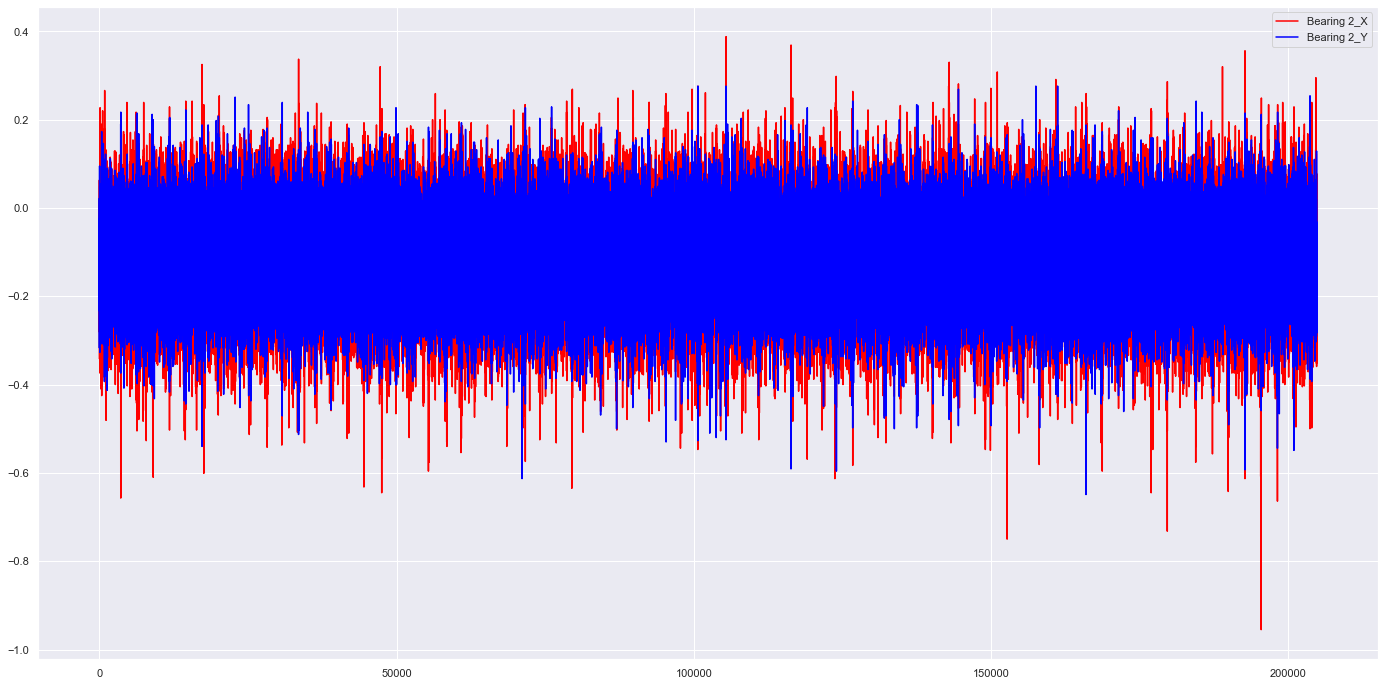

In [ ]:
#bearing 2
b2_ts.plot(figsize = (24,12), color = ['red','blue'])

# Bearing 3

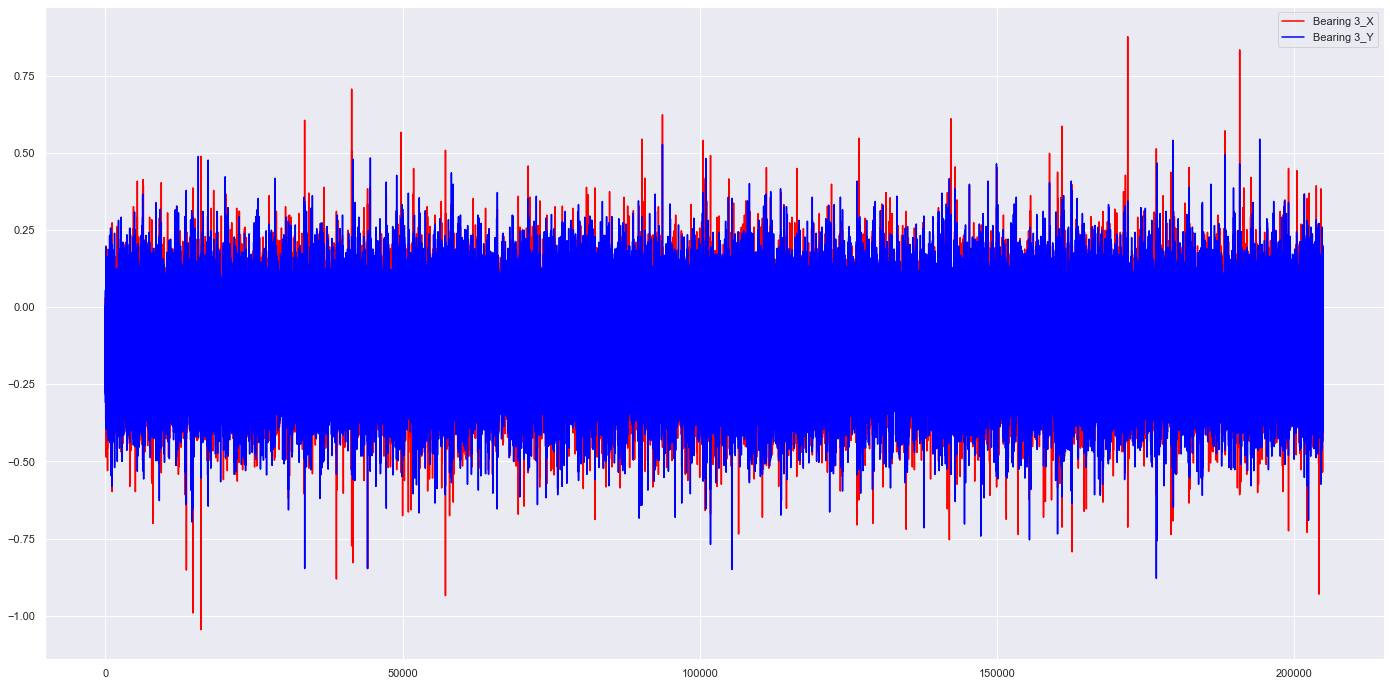

In [ ]:
#bearing 3
b3_ts.plot(figsize = (24,12), color = ['red','blue'])

# Bearing 4

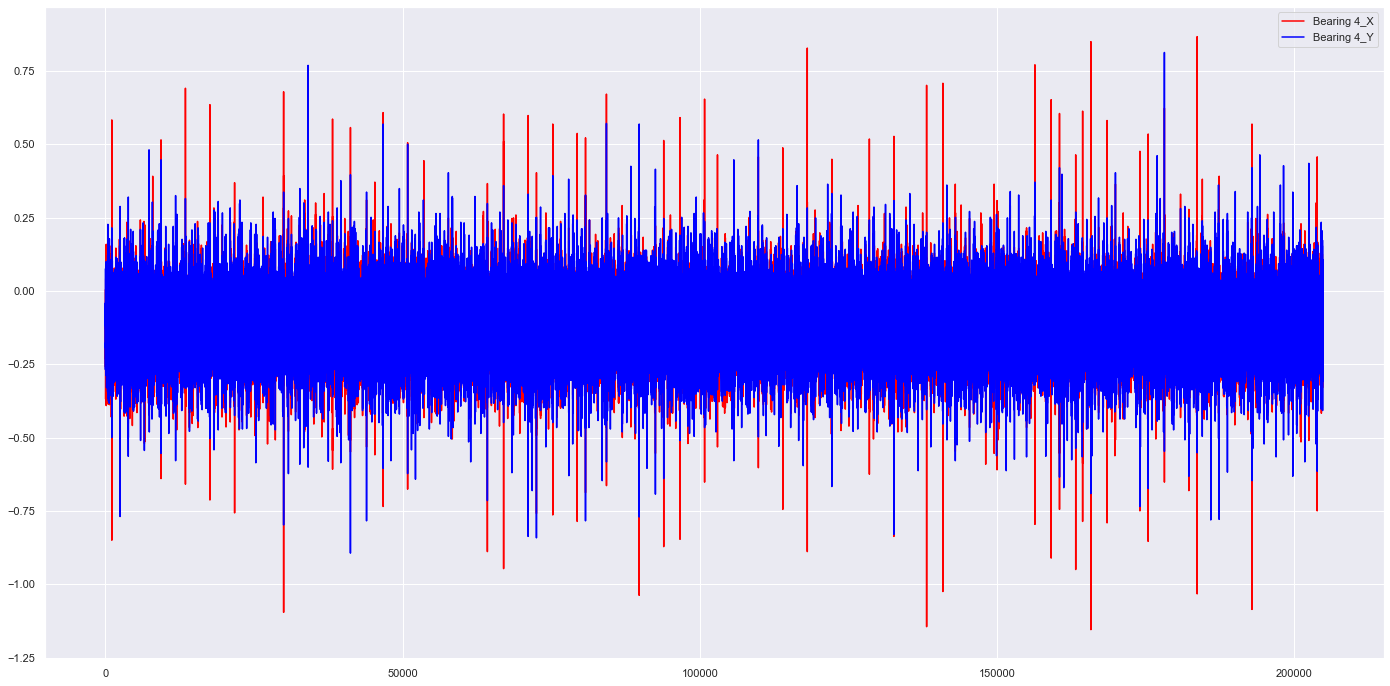

In [ ]:
#bearing 4
b4_ts.plot(figsize = (24,12), color = ['red','blue'])

# FFT Frequency domain conversion

# Bearing 1

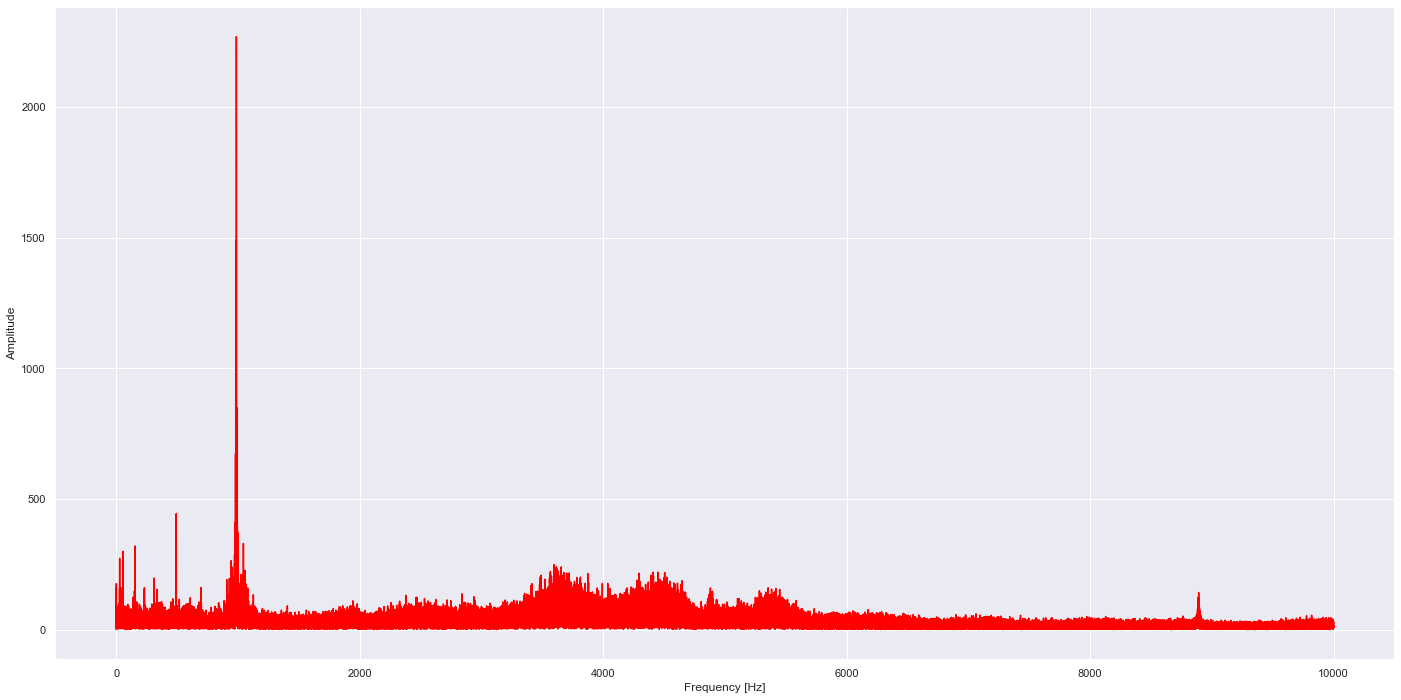

In [ ]:
b1_y_fft_np = np.array(b1_ts['Bearing 1_X'])

y_fft_b1 = scipy.fftpack.fft(b1_y_fft_np)
x_fft_b1 = scipy.fftpack.fftfreq(y_fft_b1.size, 1 / 20e3)
yfft_f_1 = abs(y_fft_b1)[:y_fft_b1.size//2]
xfft_f_1 = x_fft_b1[:x_fft_b1.size//2]
max_b1x_y = np.max(yfft_f_1)
if max_b1x_y > 5000:
    val_index_b1x = np.where(yfft_f_1 == max_b1x_y)
    yfft_f_1[val_index_b1x] = 0
range_y_b1x = np.max(yfft_f_1) + 500
plt.ylabel("Amplitude")
plt.xlabel("Frequency [Hz]")
plt.plot(xfft_f_1, yfft_f_1 , 'red')
plt.show()

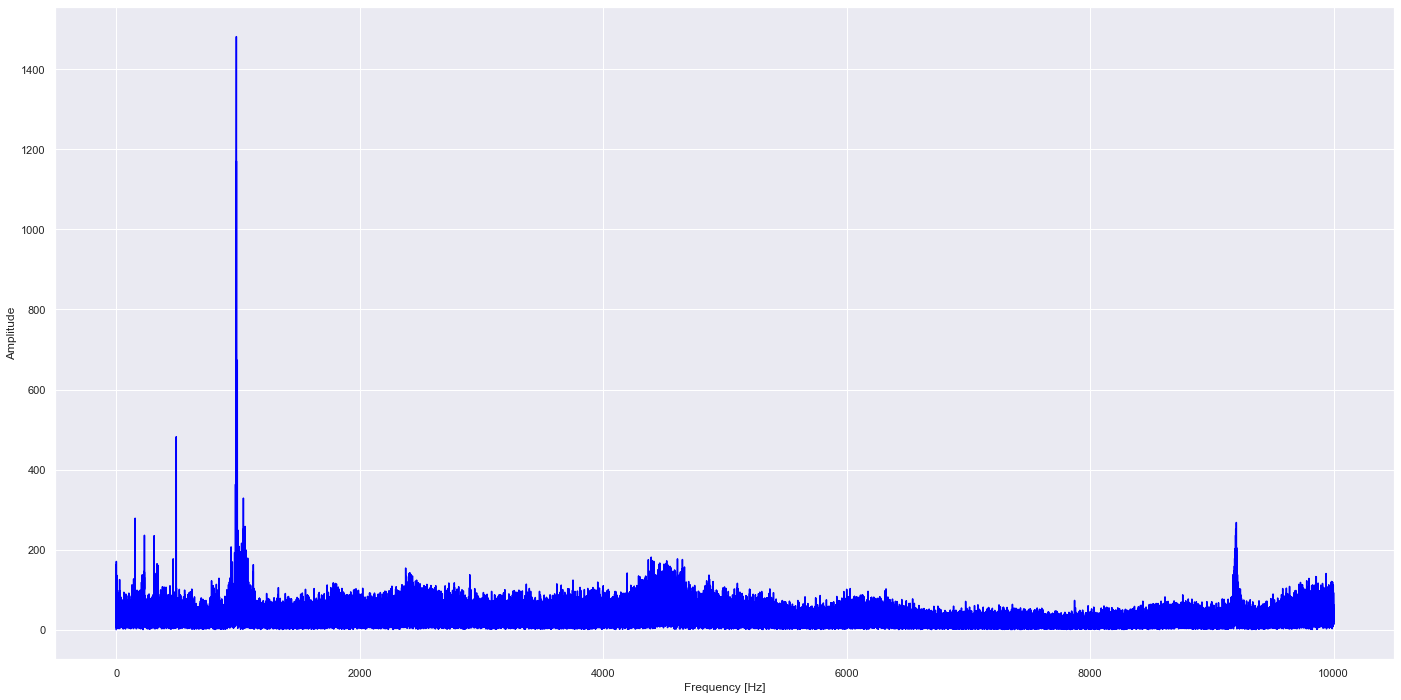

In [ ]:
b1_y_fft1_np = np.array(b1_ts['Bearing 1_Y'])

y_fft1_b1 = scipy.fftpack.fft(b1_y_fft1_np)
x_fft1_b1 = scipy.fftpack.fftfreq(y_fft1_b1.size, 1 / 20e3)
yfft_f1_1 = abs(y_fft1_b1)[:y_fft1_b1.size//2]
xfft_f1_1 = x_fft1_b1[:x_fft1_b1.size//2]
max_b1y_y = np.max(yfft_f1_1)
if max_b1y_y > 5000:
    val_index_b1y = np.where(yfft_f1_1 == max_b1y_y)
    yfft_f1_1[val_index_b1y] = 0
range_y_b1y = np.max(yfft_f1_1) + 500
plt.ylabel("Amplitude")
plt.xlabel("Frequency [Hz]")
plt.plot(xfft_f1_1, yfft_f1_1 , 'blue')
plt.show()

# Bearing 2

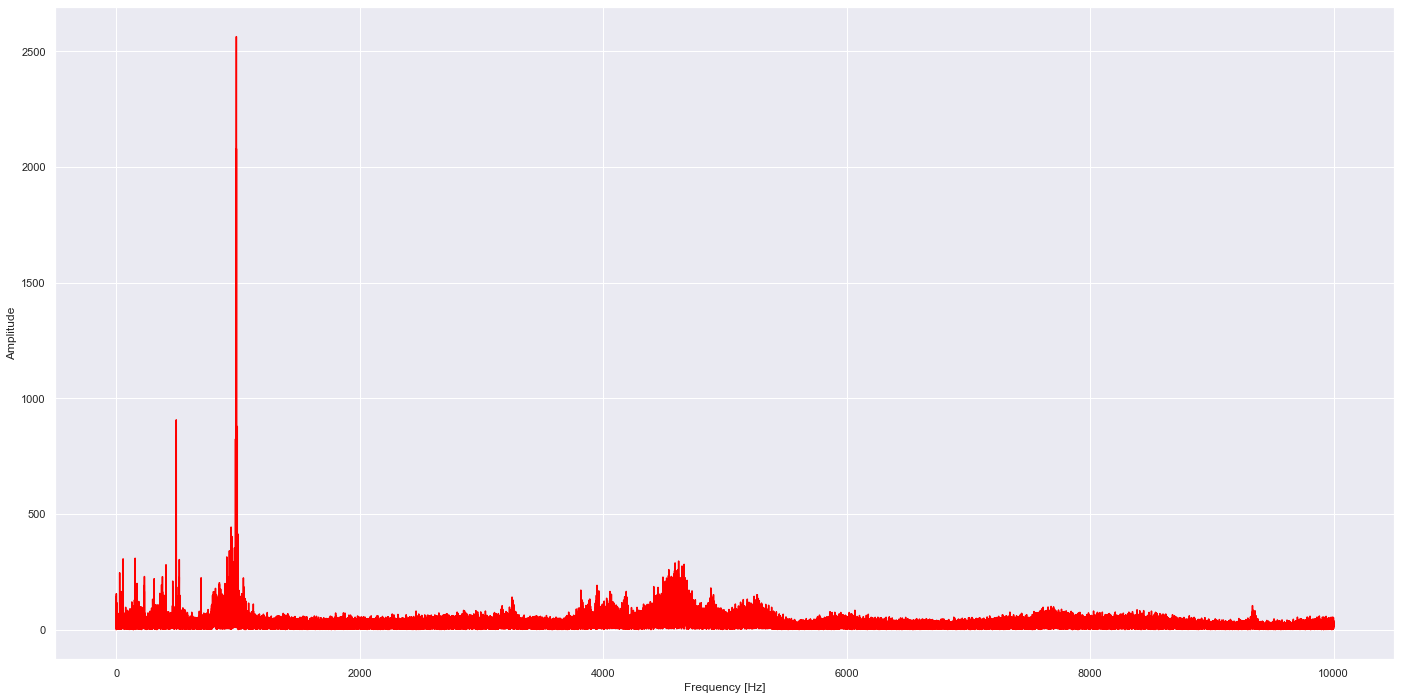

In [ ]:
b2_y_fft_np = np.array(b2_ts['Bearing 2_X'])

y_fft_b2 = scipy.fftpack.fft(b2_y_fft_np)
x_fft_b2 = scipy.fftpack.fftfreq(y_fft_b2.size, 1 / 20e3)
yfft_f_2 = abs(y_fft_b2)[:y_fft_b2.size//2]
xfft_f_2 = x_fft_b2[:x_fft_b2.size//2]
max_b2x_y = np.max(yfft_f_2)
if max_b2x_y > 5000:
    val_index_b2x = np.where(yfft_f_2 == max_b2x_y)
    yfft_f_2[val_index_b2x] = 0
range_y_b2x = np.max(yfft_f_2) + 500
plt.ylabel("Amplitude")
plt.xlabel("Frequency [Hz]")
plt.plot(xfft_f_2, yfft_f_2 , 'red')
plt.show()

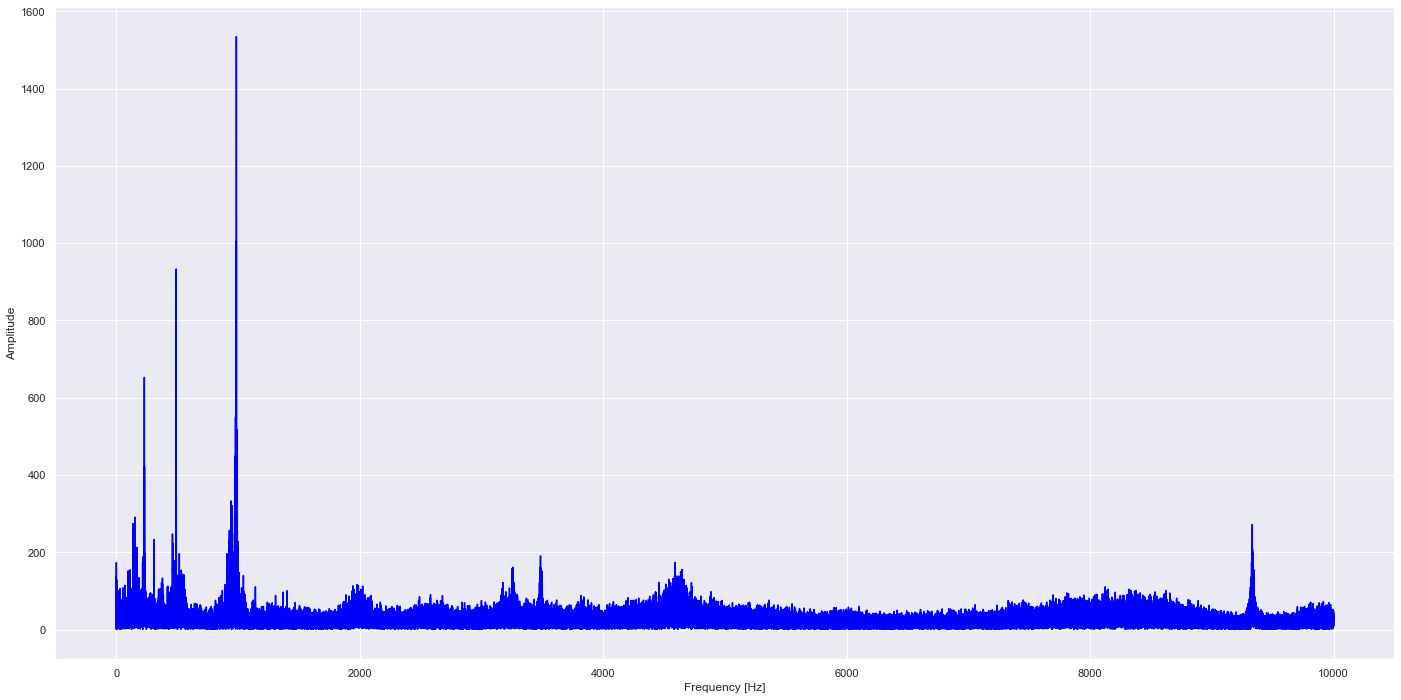

In [ ]:
b2_y_fft1_np = np.array(b2_ts['Bearing 2_Y'])

y_fft1_b2 = scipy.fftpack.fft(b2_y_fft1_np)
x_fft1_b2 = scipy.fftpack.fftfreq(y_fft1_b2.size, 1 / 20e3)
yfft_f1_2 = abs(y_fft1_b2)[:y_fft1_b2.size//2]
xfft_f1_2 = x_fft1_b2[:x_fft1_b2.size//2]
max_b2y_y = np.max(yfft_f1_2)
if max_b2y_y > 5000:
    val_index_b2y = np.where(yfft_f1_2 == max_b2y_y)
    yfft_f1_2[val_index_b2y] = 0
range_y_b2y = np.max(yfft_f1_2) + 500
plt.ylabel("Amplitude")
plt.xlabel("Frequency [Hz]")
plt.plot(xfft_f1_2, yfft_f1_2 , 'blue')
plt.show()

# Bearing 3

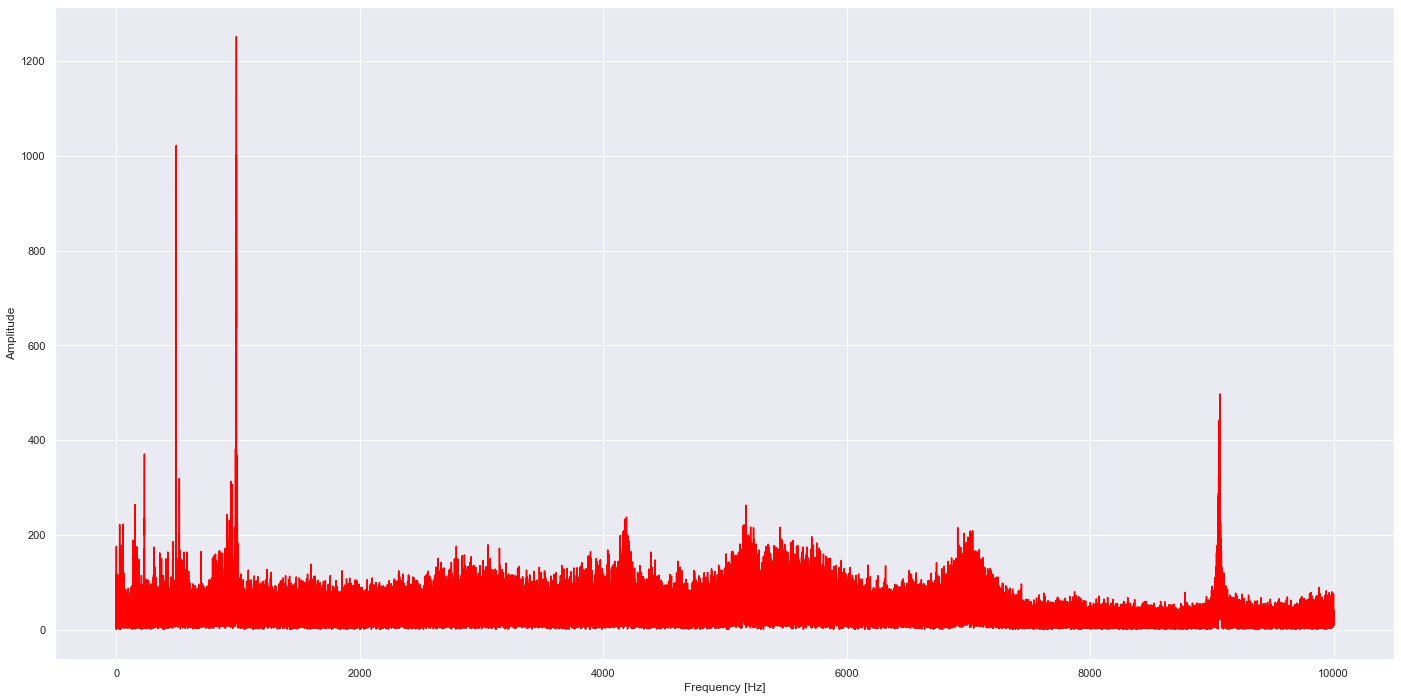

In [ ]:
b3_y_fft_np = np.array(b3_ts['Bearing 3_X'])

y_fft_b3 = scipy.fftpack.fft(b3_y_fft_np)
x_fft_b3 = scipy.fftpack.fftfreq(y_fft_b3.size, 1 / 20e3)
yfft_f_3 = abs(y_fft_b3)[:y_fft_b3.size//2]
xfft_f_3 = x_fft_b3[:x_fft_b3.size//2]
max_b3x_y = np.max(yfft_f_3)
if max_b3x_y > 5000:
    val_index_b3x = np.where(yfft_f_3 == max_b3x_y)
    yfft_f_3[val_index_b3x] = 0
range_y_b3x = np.max(yfft_f_3) + 500
plt.ylabel("Amplitude")
plt.xlabel("Frequency [Hz]")
plt.plot(xfft_f_3, yfft_f_3 , 'red')
plt.show()

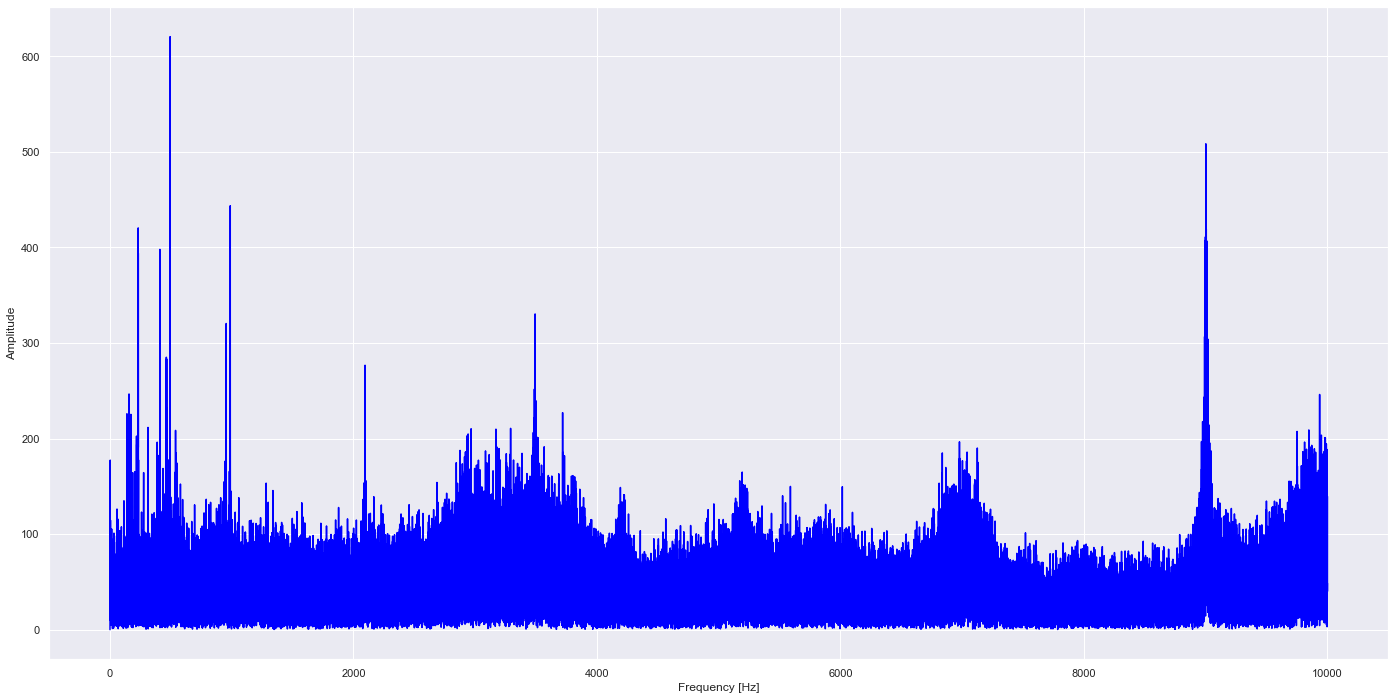

In [ ]:
b3_y_fft1_np = np.array(b3_ts['Bearing 3_Y'])

y_fft1_b3 = scipy.fftpack.fft(b3_y_fft1_np)
x_fft1_b3 = scipy.fftpack.fftfreq(y_fft1_b3.size, 1 / 20e3)
yfft_f1_3 = abs(y_fft1_b3)[:y_fft1_b3.size//2]
xfft_f1_3 = x_fft1_b3[:x_fft1_b3.size//2]
max_b3y_y = np.max(yfft_f1_3)
if max_b3y_y > 5000:
    val_index_b3y = np.where(yfft_f1_3 == max_b3y_y)
    yfft_f1_3[val_index_b3y] = 0
range_y_b3y = np.max(yfft_f1_3) + 500
plt.ylabel("Amplitude")
plt.xlabel("Frequency [Hz]")
plt.plot(xfft_f1_3, yfft_f1_3 , 'blue')
plt.show()

# Bearing 4

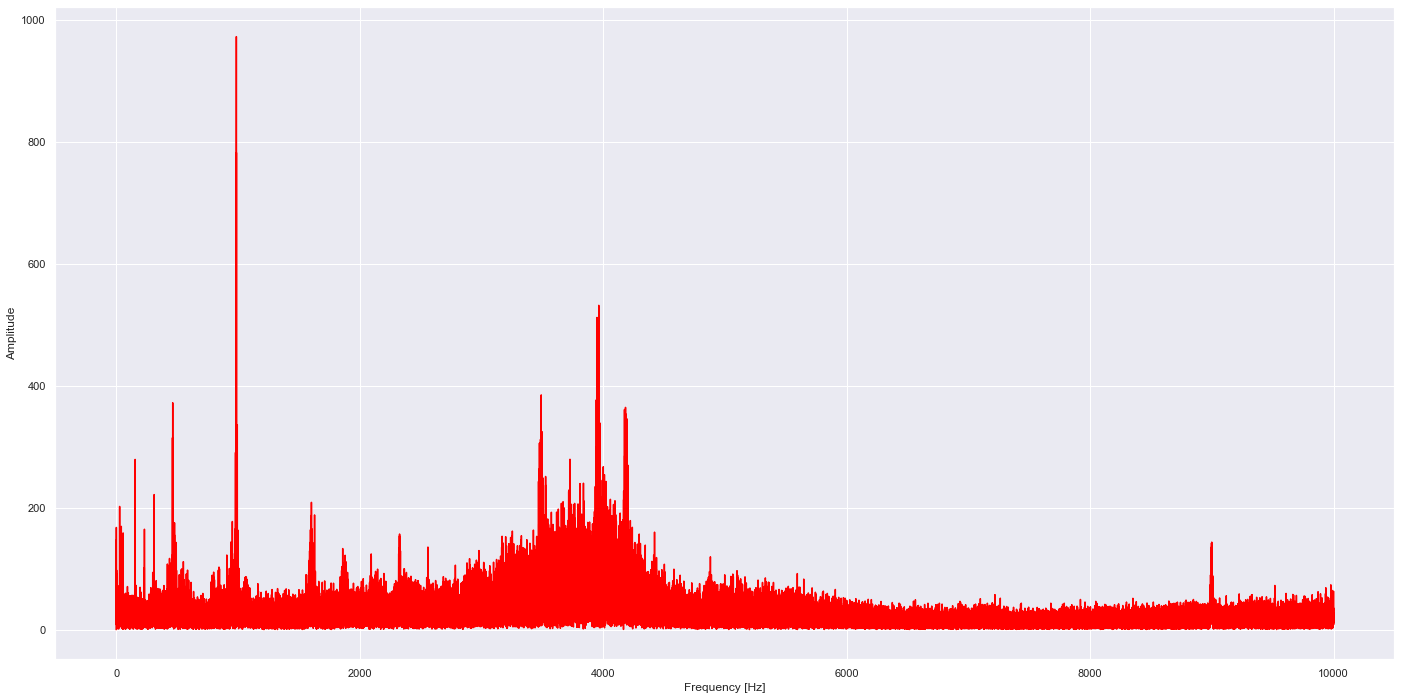

In [ ]:
b4_y_fft_np = np.array(b4_ts['Bearing 4_X'])

y_fft_b4 = scipy.fftpack.fft(b4_y_fft_np)
x_fft_b4 = scipy.fftpack.fftfreq(y_fft_b4.size, 1 / 20e3)
yfft_f_4 = abs(y_fft_b4)[:y_fft_b4.size//2]
xfft_f_4 = x_fft_b4[:x_fft_b4.size//2]
max_b4x_y = np.max(yfft_f_4)
if max_b4x_y > 5000:
    val_index_b4x = np.where(yfft_f_4 == max_b4x_y)
    yfft_f_4[val_index_b4x] = 0
range_y_b4x = np.max(yfft_f_4) + 500
plt.ylabel("Amplitude")
plt.xlabel("Frequency [Hz]")
plt.plot(xfft_f_4, yfft_f_4 , 'red')
plt.show()

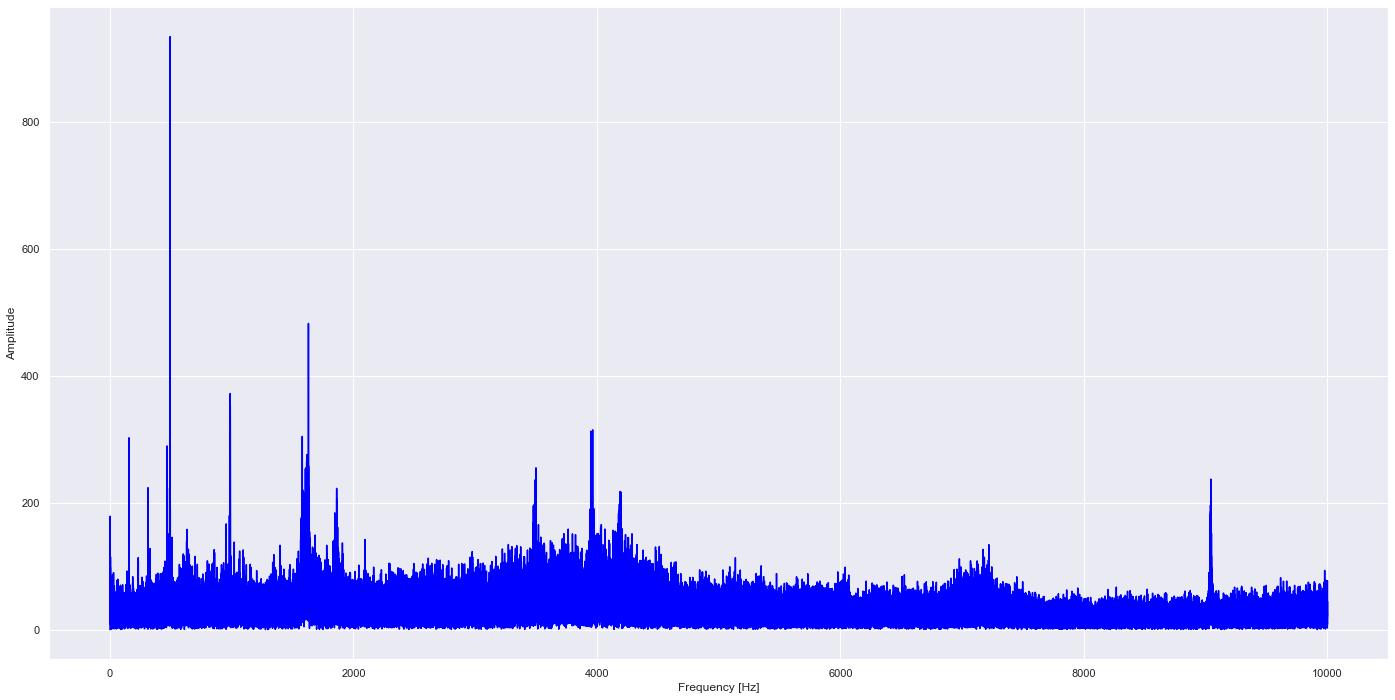

In [ ]:
b4_y_fft1_np = np.array(b4_ts['Bearing 4_Y'])

y_fft1_b4 = scipy.fftpack.fft(b4_y_fft1_np)
x_fft1_b4 = scipy.fftpack.fftfreq(y_fft1_b4.size, 1 / 20e3)
yfft_f1_4 = abs(y_fft1_b4)[:y_fft1_b4.size//2]
xfft_f1_4 = x_fft1_b4[:x_fft1_b4.size//2]
max_b4y_y = np.max(yfft_f1_4)
if max_b4y_y > 5000:
    val_index_b4y = np.where(yfft_f1_4 == max_b4y_y)
    yfft_f1_4[val_index_b4y] = 0
range_y_b4y = np.max(yfft_f1_4) + 500
plt.ylabel("Amplitude")
plt.xlabel("Frequency [Hz]")
plt.plot(xfft_f1_4, yfft_f1_4 , 'blue')
plt.show()

# Load Bearing details given

In [ ]:
data_dir = "ATLAS bearing details"
dataset_b_data = pd.DataFrame()

for filename in os.listdir(data_dir):
    print(filename)
    dataset_b_data = pd.read_csv(os.path.join(data_dir, filename), sep=',')

Bearings details.csv


In [ ]:
num_of_channels = 4
dataset_b_data[:(num_of_channels)]

,Bearing channel No,Model,Ball Diameter,Pitch Diameter,Num of Rolling Elements,Contact Angle,BPFO,BPFI,FTF,BSF
0,1.0,ZA2115,0.0084,0.0715,16.0,15.17,236.4297,296.9036,14.7768,4.2012
1,2.0,ZA2115,0.0084,0.0715,16.0,15.17,236.4297,296.9036,14.7768,4.2012
2,3.0,ZA2115,0.0084,0.0715,16.0,15.17,236.4297,296.9036,14.7768,4.2012
3,4.0,ZA2115,0.0084,0.0715,16.0,15.17,236.4297,296.9036,14.7768,4.2012


# BPFO Harmonics

In [ ]:
#Bearing 1X
max_freq_range = 20e3/2
BPFO_1X = dataset_b_data.iloc[0]['BPFO']
BPFO_1X_int = pd.to_numeric(BPFO_1X, downcast='integer')
BPFO_1X_steps = int(max_freq_range) / BPFO_1X_int
BPFO_1X_steps_int = BPFO_1X_steps.round(0)
BPFO_1X_array = np.arange(BPFO_1X_steps_int)
BPFO_1X_array = BPFO_1X_array + 1
BPFO_1X_array = BPFO_1X_array * BPFO_1X_int
BPFO_1X_array = BPFO_1X_array.round(0)

In [ ]:
#Bearing 1Y
max_freq_range = 20e3/2
BPFO_1Y = dataset_b_data.iloc[0]['BPFO']
BPFO_1Y_int = pd.to_numeric(BPFO_1Y, downcast='integer')
BPFO_1Y_steps = int(max_freq_range) / BPFO_1Y_int
BPFO_1Y_steps_int = BPFO_1Y_steps.round(0)
BPFO_1Y_array = np.arange(BPFO_1Y_steps_int)
BPFO_1Y_array = BPFO_1Y_array + 1
BPFO_1Y_array = BPFO_1Y_array * BPFO_1Y_int
BPFO_1Y_array = BPFO_1Y_array.round(0)

In [ ]:
#Bearing 2X
max_freq_range = 20e3/2
BPFO_2X = dataset_b_data.iloc[1]['BPFO']
BPFO_2X_int = pd.to_numeric(BPFO_2X, downcast='integer')
BPFO_2X_steps = int(max_freq_range) / BPFO_2X_int
BPFO_2X_steps_int = BPFO_2X_steps.round(0)
BPFO_2X_array = np.arange(BPFO_2X_steps_int)
BPFO_2X_array = BPFO_2X_array + 1
BPFO_2X_array = BPFO_2X_array * BPFO_2X_int
BPFO_2X_array = BPFO_2X_array.round(0)

In [ ]:
#Bearing 2Y
max_freq_range = 20e3/2
BPFO_2Y = dataset_b_data.iloc[1]['BPFO']
BPFO_2Y_int = pd.to_numeric(BPFO_2Y, downcast='integer')
BPFO_2Y_steps = int(max_freq_range) / BPFO_2Y_int
BPFO_2Y_steps_int = BPFO_2Y_steps.round(0)
BPFO_2Y_array = np.arange(BPFO_2Y_steps_int)
BPFO_2Y_array = BPFO_2Y_array + 1
BPFO_2Y_array = BPFO_2Y_array * BPFO_2Y_int
BPFO_2Y_array = BPFO_2Y_array.round(0)

In [ ]:
#Bearing 3X
max_freq_range = 20e3/2
BPFO_3X = dataset_b_data.iloc[2]['BPFO']
BPFO_3X_int = pd.to_numeric(BPFO_3X, downcast='integer')
BPFO_3X_steps = int(max_freq_range) / BPFO_3X_int
BPFO_3X_steps_int = BPFO_3X_steps.round(0)
BPFO_3X_array = np.arange(BPFO_3X_steps_int)
BPFO_3X_array = BPFO_3X_array + 1
BPFO_3X_array = BPFO_3X_array * BPFO_3X_int
BPFO_3X_array = BPFO_3X_array.round(0)

In [ ]:
#Bearing 3Y
max_freq_range = 20e3/2
BPFO_3Y = dataset_b_data.iloc[2]['BPFO']
BPFO_3Y_int = pd.to_numeric(BPFO_3Y, downcast='integer')
BPFO_3Y_steps = int(max_freq_range) / BPFO_3Y_int
BPFO_3Y_steps_int = BPFO_3Y_steps.round(0)
BPFO_3Y_array = np.arange(BPFO_3Y_steps_int)
BPFO_3Y_array = BPFO_3Y_array + 1
BPFO_3Y_array = BPFO_3Y_array * BPFO_3Y_int
BPFO_3Y_array = BPFO_3Y_array.round(0)

In [ ]:
#Bearing 4X
max_freq_range = 20e3/2
BPFO_4X = dataset_b_data.iloc[3]['BPFO']
BPFO_4X_int = pd.to_numeric(BPFO_4X, downcast='integer')
BPFO_4X_steps = int(max_freq_range) / BPFO_4X_int
BPFO_4X_steps_int = BPFO_4X_steps.round(0)
BPFO_4X_array = np.arange(BPFO_4X_steps_int)
BPFO_4X_array = BPFO_4X_array + 1
BPFO_4X_array = BPFO_4X_array * BPFO_4X_int
BPFO_4X_array = BPFO_4X_array.round(0)

In [ ]:
#Bearing 4Y
max_freq_range = 20e3/2
BPFO_4Y = dataset_b_data.iloc[3]['BPFO']
BPFO_4Y_int = pd.to_numeric(BPFO_4Y, downcast='integer')
BPFO_4Y_steps = int(max_freq_range) / BPFO_4Y_int
BPFO_4Y_steps_int = BPFO_4Y_steps.round(0)
BPFO_4Y_array = np.arange(BPFO_4Y_steps_int)
BPFO_4Y_array = BPFO_4Y_array + 1
BPFO_4Y_array = BPFO_4Y_array * BPFO_4Y_int
BPFO_4Y_array = BPFO_4Y_array.round(0)

# BPFI Harmonics

In [ ]:
#Bearing 1X
max_freq_range = 20e3/2
BPFI_1X = dataset_b_data.iloc[0]['BPFI']
BPFI_1X_int = pd.to_numeric(BPFI_1X, downcast='integer')
BPFI_1X_steps = int(max_freq_range) / BPFI_1X_int
BPFI_1X_steps_int = BPFI_1X_steps.round(0)
BPFI_1X_array = np.arange(BPFI_1X_steps_int)
BPFI_1X_array = BPFI_1X_array + 1
BPFI_1X_array = BPFI_1X_array * BPFI_1X_int
BPFI_1X_array = BPFI_1X_array.round(0)

In [ ]:
#Bearing 1Y
max_freq_range = 20e3/2
BPFI_1Y = dataset_b_data.iloc[0]['BPFI']
BPFI_1Y_int = pd.to_numeric(BPFI_1Y, downcast='integer')
BPFI_1Y_steps = int(max_freq_range) / BPFI_1Y_int
BPFI_1Y_steps_int = BPFI_1Y_steps.round(0)
BPFI_1Y_array = np.arange(BPFI_1Y_steps_int)
BPFI_1Y_array = BPFI_1Y_array + 1
BPFI_1Y_array = BPFI_1Y_array * BPFI_1Y_int
BPFI_1Y_array = BPFI_1Y_array.round(0)

In [ ]:
#Bearing 2X
max_freq_range = 20e3/2
BPFI_2X = dataset_b_data.iloc[1]['BPFI']
BPFI_2X_int = pd.to_numeric(BPFI_2X, downcast='integer')
BPFI_2X_steps = int(max_freq_range) / BPFI_2X_int
BPFI_2X_steps_int = BPFI_2X_steps.round(0)
BPFI_2X_array = np.arange(BPFI_2X_steps_int)
BPFI_2X_array = BPFI_2X_array + 1
BPFI_2X_array = BPFI_2X_array * BPFI_2X_int
BPFI_2X_array = BPFI_2X_array.round(0)

In [ ]:
#Bearing 2Y
max_freq_range = 20e3/2
BPFI_2Y = dataset_b_data.iloc[1]['BPFI']
BPFI_2Y_int = pd.to_numeric(BPFI_2Y, downcast='integer')
BPFI_2Y_steps = int(max_freq_range) / BPFI_2Y_int
BPFI_2Y_steps_int = BPFI_2Y_steps.round(0)
BPFI_2Y_array = np.arange(BPFI_2Y_steps_int)
BPFI_2Y_array = BPFI_2Y_array + 1
BPFI_2Y_array = BPFI_2Y_array * BPFI_2Y_int
BPFI_2Y_array = BPFI_2Y_array.round(0)

In [ ]:
#Bearing 3X
max_freq_range = 20e3/2
BPFI_3X = dataset_b_data.iloc[2]['BPFI']
BPFI_3X_int = pd.to_numeric(BPFI_3X, downcast='integer')
BPFI_3X_steps = int(max_freq_range) / BPFI_3X_int
BPFI_3X_steps_int = BPFI_3X_steps.round(0)
BPFI_3X_array = np.arange(BPFI_3X_steps_int)
BPFI_3X_array = BPFI_3X_array + 1
BPFI_3X_array = BPFI_3X_array * BPFI_3X_int
BPFI_3X_array = BPFI_3X_array.round(0)

In [ ]:
#Bearing 3Y
max_freq_range = 20e3/2
BPFI_3Y = dataset_b_data.iloc[2]['BPFI']
BPFI_3Y_int = pd.to_numeric(BPFI_3Y, downcast='integer')
BPFI_3Y_steps = int(max_freq_range) / BPFI_3Y_int
BPFI_3Y_steps_int = BPFI_3Y_steps.round(0)
BPFI_3Y_array = np.arange(BPFI_3Y_steps_int)
BPFI_3Y_array = BPFI_3Y_array + 1
BPFI_3Y_array = BPFI_3Y_array * BPFI_3Y_int
BPFI_3Y_array = BPFI_3Y_array.round(0)

In [ ]:
#Bearing 4X
max_freq_range = 20e3/2
BPFI_4X = dataset_b_data.iloc[3]['BPFI']
BPFI_4X_int = pd.to_numeric(BPFI_4X, downcast='integer')
BPFI_4X_steps = int(max_freq_range) / BPFI_4X_int
BPFI_4X_steps_int = BPFI_4X_steps.round(0)
BPFI_4X_array = np.arange(BPFI_4X_steps_int)
BPFI_4X_array = BPFI_4X_array + 1
BPFI_4X_array = BPFI_4X_array * BPFI_4X_int
BPFI_4X_array = BPFI_4X_array.round(0)

In [ ]:
#Bearing 4Y
max_freq_range = 20e3/2
BPFI_4Y = dataset_b_data.iloc[3]['BPFI']
BPFI_4Y_int = pd.to_numeric(BPFI_4Y, downcast='integer')
BPFI_4Y_steps = int(max_freq_range) / BPFI_4Y_int
BPFI_4Y_steps_int = BPFI_4Y_steps.round(0)
BPFI_4Y_array = np.arange(BPFI_4Y_steps_int)
BPFI_4Y_array = BPFI_4Y_array + 1
BPFI_4Y_array = BPFI_4Y_array * BPFI_4Y_int
BPFI_4Y_array = BPFI_4Y_array.round(0)

# FTF Harmonics

In [ ]:
#Bearing 1X
max_freq_range = 20e3/2
FTF_1X = dataset_b_data.iloc[0]['FTF']
FTF_1X_int = pd.to_numeric(FTF_1X, downcast='integer')
FTF_1X_steps = int(max_freq_range) / FTF_1X_int
FTF_1X_steps_int = FTF_1X_steps.round(0)
FTF_1X_array = np.arange(FTF_1X_steps_int)
FTF_1X_array = FTF_1X_array + 1
FTF_1X_array = FTF_1X_array * FTF_1X_int
FTF_1X_array = FTF_1X_array.round(0)

In [ ]:
#Bearing 1Y
max_freq_range = 20e3/2
FTF_1Y = dataset_b_data.iloc[0]['FTF']
FTF_1Y_int = pd.to_numeric(FTF_1Y, downcast='integer')
FTF_1Y_steps = int(max_freq_range) / FTF_1Y_int
FTF_1Y_steps_int = FTF_1Y_steps.round(0)
FTF_1Y_array = np.arange(FTF_1Y_steps_int)
FTF_1Y_array = FTF_1Y_array + 1
FTF_1Y_array = FTF_1Y_array * FTF_1Y_int
FTF_1Y_array = FTF_1Y_array.round(0)

In [ ]:
#Bearing 2X
max_freq_range = 20e3/2
FTF_2X = dataset_b_data.iloc[1]['FTF']
FTF_2X_int = pd.to_numeric(FTF_2X, downcast='integer')
FTF_2X_steps = int(max_freq_range) / FTF_2X_int
FTF_2X_steps_int = FTF_2X_steps.round(0)
FTF_2X_array = np.arange(FTF_2X_steps_int)
FTF_2X_array = FTF_2X_array + 1
FTF_2X_array = FTF_2X_array * FTF_2X_int
FTF_2X_array = FTF_2X_array.round(0)

In [ ]:
#Bearing 2Y
max_freq_range = 20e3/2
FTF_2Y = dataset_b_data.iloc[1]['FTF']
FTF_2Y_int = pd.to_numeric(FTF_2Y, downcast='integer')
FTF_2Y_steps = int(max_freq_range) / FTF_2Y_int
FTF_2Y_steps_int = FTF_2Y_steps.round(0)
FTF_2Y_array = np.arange(FTF_2Y_steps_int)
FTF_2Y_array = FTF_2Y_array + 1
FTF_2Y_array = FTF_2Y_array * FTF_2Y_int
FTF_2Y_array = FTF_2Y_array.round(0)

In [ ]:
#Bearing 3X
max_freq_range = 20e3/2
FTF_3X = dataset_b_data.iloc[2]['FTF']
FTF_3X_int = pd.to_numeric(FTF_3X, downcast='integer')
FTF_3X_steps = int(max_freq_range) / FTF_3X_int
FTF_3X_steps_int = FTF_3X_steps.round(0)
FTF_3X_array = np.arange(FTF_3X_steps_int)
FTF_3X_array = FTF_3X_array + 1
FTF_3X_array = FTF_3X_array * FTF_3X_int
FTF_3X_array = FTF_3X_array.round(0)

In [ ]:
#Bearing 3Y
max_freq_range = 20e3/2
FTF_3Y = dataset_b_data.iloc[2]['FTF']
FTF_3Y_int = pd.to_numeric(FTF_3Y, downcast='integer')
FTF_3Y_steps = int(max_freq_range) / FTF_3Y_int
FTF_3Y_steps_int = FTF_3Y_steps.round(0)
FTF_3Y_array = np.arange(FTF_3Y_steps_int)
FTF_3Y_array =FTF_3Y_array + 1
FTF_3Y_array = FTF_3Y_array * FTF_3Y_int
FTF_3Y_array = FTF_3Y_array.round(0)

In [ ]:
#Bearing 4X
max_freq_range = 20e3/2
FTF_4X = dataset_b_data.iloc[3]['FTF']
FTF_4X_int = pd.to_numeric(FTF_4X, downcast='integer')
FTF_4X_steps = int(max_freq_range) / FTF_4X_int
FTF_4X_steps_int = FTF_4X_steps.round(0)
FTF_4X_array = np.arange(FTF_4X_steps_int)
FTF_4X_array = FTF_4X_array + 1
FTF_4X_array = FTF_4X_array * FTF_4X_int
FTF_4X_array = FTF_4X_array.round(0)

In [ ]:
#Bearing 4Y
max_freq_range = 20e3/2
FTF_4Y = dataset_b_data.iloc[3]['FTF']
FTF_4Y_int = pd.to_numeric(FTF_4Y, downcast='integer')
FTF_4Y_steps = int(max_freq_range) / FTF_4Y_int
FTF_4Y_steps_int = FTF_4Y_steps.round(0)
FTF_4Y_array = np.arange(FTF_4Y_steps_int)
FTF_4Y_array = FTF_4Y_array + 1
FTF_4Y_array = FTF_4Y_array * FTF_4Y_int
FTF_4Y_array = FTF_4Y_array.round(0)

# BSF Harmonics

In [ ]:
#Bearing 1X
max_freq_range = 20e3/2
BSF_1X = dataset_b_data.iloc[0]['BSF']
BSF_1X_int = pd.to_numeric(BSF_1X, downcast='integer')
BSF_1X_steps = int(max_freq_range) / BSF_1X_int
BSF_1X_steps_int = BSF_1X_steps.round(0)
BSF_1X_array = np.arange(BSF_1X_steps_int)
BSF_1X_array = BSF_1X_array + 1
BSF_1X_array = BSF_1X_array * BSF_1X_int
BSF_1X_array = BSF_1X_array.round(0)

In [ ]:
#Bearing 1Y
max_freq_range = 20e3/2
BSF_1Y = dataset_b_data.iloc[0]['BSF']
BSF_1Y_int = pd.to_numeric(BSF_1Y, downcast='integer')
BSF_1Y_steps = int(max_freq_range) / BSF_1Y_int
BSF_1Y_steps_int = BSF_1Y_steps.round(0)
BSF_1Y_array = np.arange(BSF_1Y_steps_int)
BSF_1Y_array = BSF_1Y_array + 1
BSF_1Y_array = BSF_1Y_array * FTF_1Y_int
BSF_1Y_array = BSF_1Y_array.round(0)

In [ ]:
#Bearing 2X
max_freq_range = 20e3/2
BSF_2X = dataset_b_data.iloc[1]['BSF']
BSF_2X_int = pd.to_numeric(BSF_2X, downcast='integer')
BSF_2X_steps = int(max_freq_range) / BSF_2X_int
BSF_2X_steps_int = BSF_2X_steps.round(0)
BSF_2X_array = np.arange(BSF_2X_steps_int)
BSF_2X_array = BSF_2X_array + 1
BSF_2X_array = BSF_2X_array * BSF_2X_int
BSF_2X_array = BSF_2X_array.round(0)

In [ ]:
#Bearing 2Y
max_freq_range = 20e3/2
BSF_2Y = dataset_b_data.iloc[1]['BSF']
BSF_2Y_int = pd.to_numeric(BSF_2Y, downcast='integer')
BSF_2Y_steps = int(max_freq_range) / BSF_2Y_int
BSF_2Y_steps_int = BSF_2Y_steps.round(0)
BSF_2Y_array = np.arange(BSF_2Y_steps_int)
BSF_2Y_array = BSF_2Y_array + 1
BSF_2Y_array = BSF_2Y_array * BSF_2Y_int
BSF_2Y_array = BSF_2Y_array.round(0)

In [ ]:
#Bearing 3X
max_freq_range = 20e3/2
BSF_3X = dataset_b_data.iloc[2]['BSF']
BSF_3X_int = pd.to_numeric(BSF_3X, downcast='integer')
BSF_3X_steps = int(max_freq_range) / BSF_3X_int
BSF_3X_steps_int = BSF_3X_steps.round(0)
BSF_3X_array = np.arange(BSF_3X_steps_int)
BSF_3X_array = BSF_3X_array + 1
BSF_3X_array = BSF_3X_array * BSF_3X_int
BSF_3X_array = BSF_3X_array.round(0)

In [ ]:
#Bearing 3Y
max_freq_range = 20e3/2
BSF_3Y = dataset_b_data.iloc[2]['BSF']
BSF_3Y_int = pd.to_numeric(BSF_3Y, downcast='integer')
BSF_3Y_steps = int(max_freq_range) / BSF_3Y_int
BSF_3Y_steps_int = BSF_3Y_steps.round(0)
BSF_3Y_array = np.arange(BSF_3Y_steps_int)
BSF_3Y_array =BSF_3Y_array + 1
BSF_3Y_array = BSF_3Y_array * BSF_3Y_int
BSF_3Y_array = BSF_3Y_array.round(0)

In [ ]:
#Bearing 4X
max_freq_range = 20e3/2
BSF_4X = dataset_b_data.iloc[3]['BSF']
BSF_4X_int = pd.to_numeric(BSF_4X, downcast='integer')
BSF_4X_steps = int(max_freq_range) / BSF_4X_int
BSF_4X_steps_int = BSF_4X_steps.round(0)
BSF_4X_array = np.arange(BSF_4X_steps_int)
BSF_4X_array = BSF_4X_array + 1
BSF_4X_array = BSF_4X_array * BSF_4X_int
BSF_4X_array = BSF_4X_array.round(0)

In [ ]:
#Bearing 4Y
max_freq_range = 20e3/2
BSF_4Y = dataset_b_data.iloc[3]['BSF']
BSF_4Y_int = pd.to_numeric(BSF_4Y, downcast='integer')
BSF_4Y_steps = int(max_freq_range) / BSF_4Y_int
BSF_4Y_steps_int = BSF_4Y_steps.round(0)
BSF_4Y_array = np.arange(BSF_4Y_steps_int)
BSF_4Y_array = BSF_4Y_array + 1
BSF_4Y_array = BSF_4Y_array * BSF_4Y_int
BSF_4Y_array = BSF_4Y_array.round(0)

# Bearing 1_X BPFO

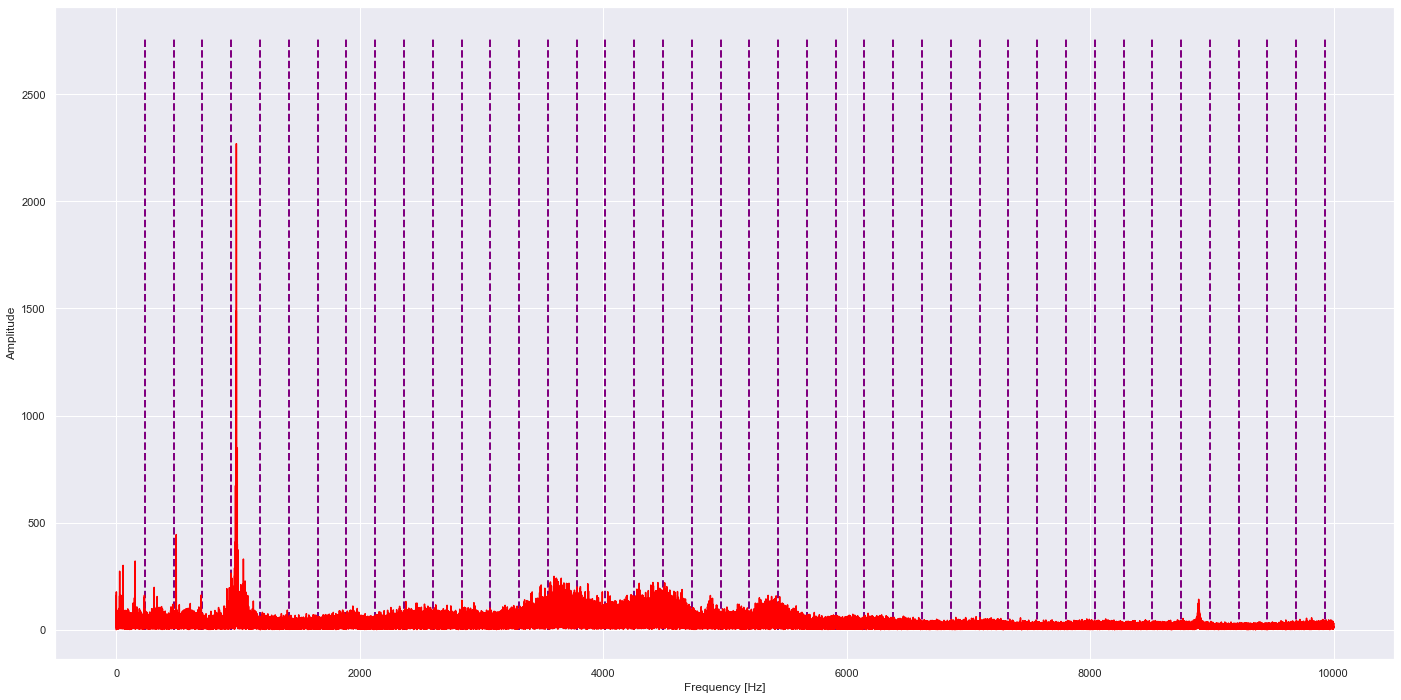

In [ ]:
plt.ylabel("Amplitude")
plt.xlabel("Frequency [Hz]")
plt.plot(xfft_f_1, yfft_f_1 , 'red')
plt.vlines(x=BPFO_1X_array, ymin=0, ymax=range_y_b1x, colors='purple', ls='--', lw=2, label='BPFO_1X Harmonics')
plt.show()

# Bearing 1_Y BPFO

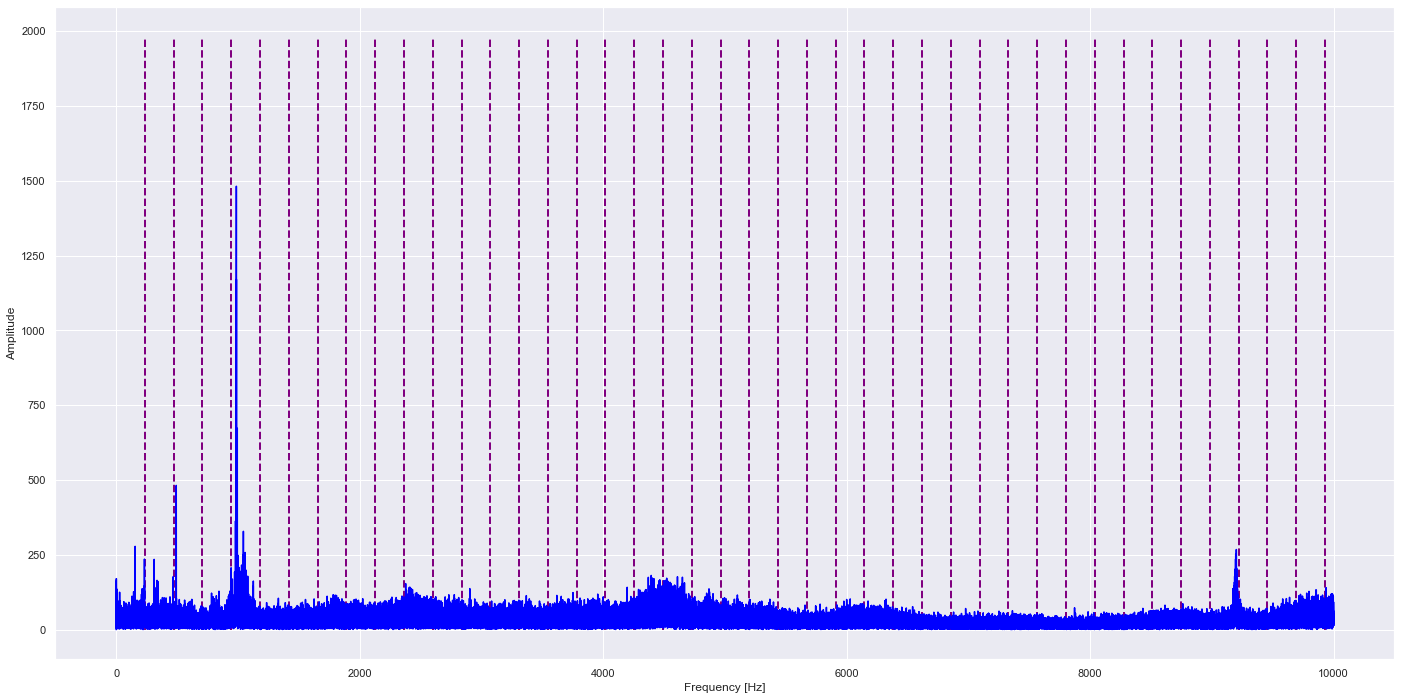

In [ ]:
plt.ylabel("Amplitude")
plt.xlabel("Frequency [Hz]")
plt.plot(xfft_f1_1, yfft_f1_1 , 'blue')
plt.vlines(x=BPFO_1Y_array, ymin=0, ymax=range_y_b1y, colors='purple', ls='--', lw=2, label='BPFO_1Y Harmonics')
plt.show()

# Bearing 2_X BPFO

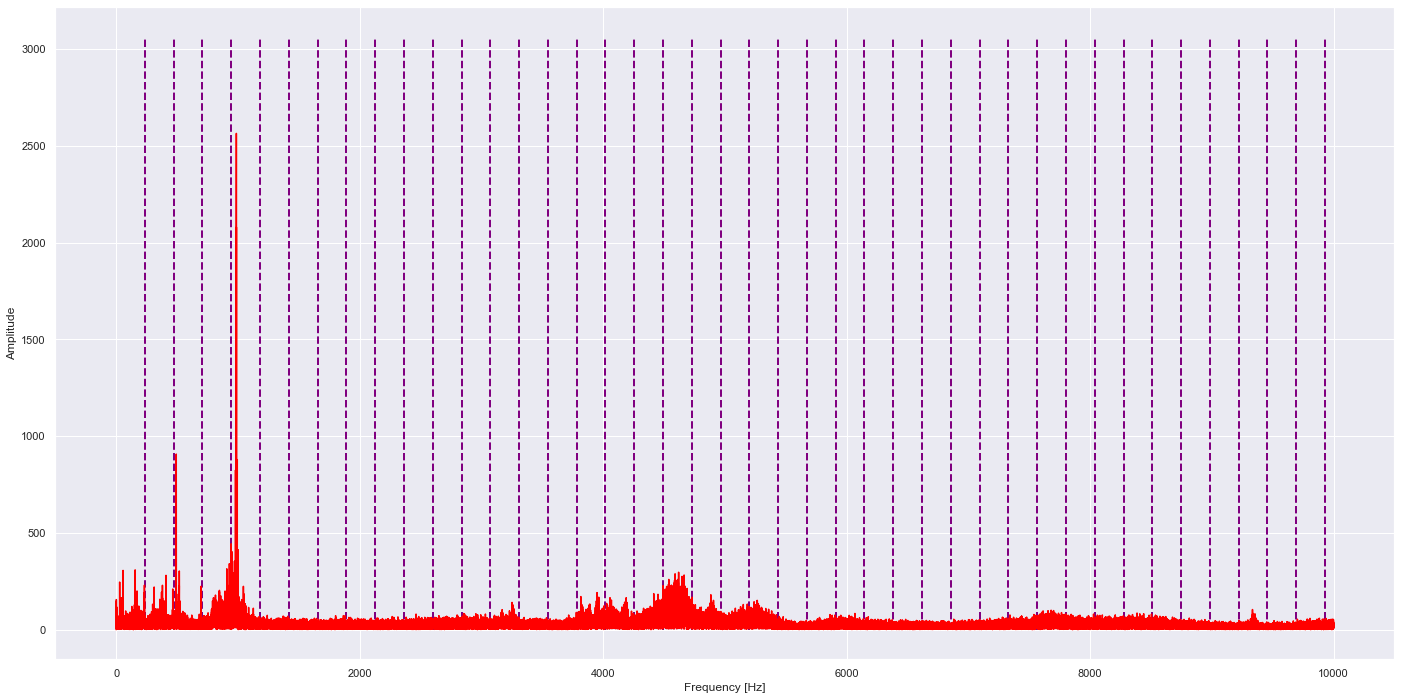

In [ ]:
plt.ylabel("Amplitude")
plt.xlabel("Frequency [Hz]")
plt.plot(xfft_f_2, yfft_f_2 , 'red')
plt.vlines(x=BPFO_2X_array, ymin=0, ymax=range_y_b2x, colors='purple', ls='--', lw=2, label='BPFO_2X Harmonics')
plt.show()

# Bearing 2_Y BPFO

In [ ]:
plt.ylabel("Amplitude")
plt.xlabel("Frequency [Hz]")
plt.plot(xfft_f1_2, yfft_f1_2 , 'blue')
plt.vlines(x=BPFO_2Y_array, ymin=0, ymax=range_y_b2y, colors='purple', ls='--', lw=2, label='BPFO_2Y Harmonics')
plt.show()

# Bearing 3_X BPFO

In [ ]:
plt.ylabel("Amplitude")
plt.xlabel("Frequency [Hz]")
plt.plot(xfft_f_3, yfft_f_3 , 'red')
plt.vlines(x=BPFO_3X_array, ymin=0, ymax=range_y_b3x, colors='purple', ls='--', lw=2, label='BPFO_3X Harmonics')
plt.show()

# Bearing 3_Y BPFO

In [ ]:
plt.ylabel("Amplitude")
plt.xlabel("Frequency [Hz]")
plt.plot(xfft_f1_3, yfft_f1_3 , 'blue')
plt.vlines(x=BPFO_3Y_array, ymin=0, ymax=range_y_b3y, colors='purple', ls='--', lw=2, label='BPFO_3Y Harmonics')
plt.show()

# Bearing 4_X BPFO

In [ ]:
plt.ylabel("Amplitude")
plt.xlabel("Frequency [Hz]")
plt.plot(xfft_f_4, yfft_f_4 , 'red')
plt.vlines(x=BPFO_4X_array, ymin=0, ymax=range_y_b4x, colors='purple', ls='--', lw=2, label='BPFO_4X Harmonics')
plt.show()

# Bearing 4_Y BPFO

In [ ]:
plt.ylabel("Amplitude")
plt.xlabel("Frequency [Hz]")
plt.plot(xfft_f1_4, yfft_f1_4 , 'blue')
plt.vlines(x=BPFO_4Y_array, ymin=0, ymax=range_y_b4y, colors='purple', ls='--', lw=2, label='BPFO_4Y Harmonics')
plt.show()

# Bearing 1_X BPFI

In [ ]:
plt.ylabel("Amplitude")
plt.xlabel("Frequency [Hz]")
plt.plot(xfft_f_1, yfft_f_1 , 'red')
plt.vlines(x=BPFI_1X_array, ymin=0, ymax=range_y_b1x, colors='brown', ls='--', lw=2, label='BPFI_1X Harmonics')
plt.show()

# Bearing 1_Y BPFI

In [ ]:
plt.ylabel("Amplitude")
plt.xlabel("Frequency [Hz]")
plt.plot(xfft_f1_1, yfft_f1_1 , 'blue')
plt.vlines(x=BPFI_1Y_array, ymin=0, ymax=range_y_b1y, colors='brown', ls='--', lw=2, label='BPFI_1Y Harmonics')
plt.show()

# Bearing 2_X BPFI

In [ ]:
plt.ylabel("Amplitude")
plt.xlabel("Frequency [Hz]")
plt.plot(xfft_f_2, yfft_f_2 , 'red')
plt.vlines(x=BPFI_2X_array, ymin=0, ymax=range_y_b2x, colors='brown', ls='--', lw=2, label='BPFI_2X Harmonics')
plt.show()

# Bearing 2_Y BPFI

In [ ]:
plt.ylabel("Amplitude")
plt.xlabel("Frequency [Hz]")
plt.plot(xfft_f1_4, yfft_f1_4 , 'blue')
plt.vlines(x=BPFI_4Y_array, ymin=0, ymax=range_y_b4y, colors='brown', ls='--', lw=2, label='BPFI_4Y Harmonics')
plt.show()

# Bearing 3_X BPFI

In [ ]:
plt.ylabel("Amplitude")
plt.xlabel("Frequency [Hz]")
plt.plot(xfft_f_3, yfft_f_3 , 'red')
plt.vlines(x=BPFI_3X_array, ymin=0, ymax=range_y_b3x, colors='brown', ls='--', lw=2, label='BPFI_3X Harmonics')
plt.show()

# Bearing 3_Y BPFI

In [ ]:
plt.ylabel("Amplitude")
plt.xlabel("Frequency [Hz]")
plt.plot(xfft_f1_3, yfft_f1_3 , 'blue')
plt.vlines(x=BPFI_3Y_array, ymin=0, ymax=range_y_b3y, colors='brown', ls='--', lw=2, label='BPFI_3Y Harmonics')
plt.show()

# Bearing 4_X BPFI

In [ ]:
plt.ylabel("Amplitude")
plt.xlabel("Frequency [Hz]")
plt.plot(xfft_f_4, yfft_f_4 , 'red')
plt.vlines(x=BPFI_4X_array, ymin=0, ymax=range_y_b4x, colors='brown', ls='--', lw=2, label='BPFI_4X Harmonics')
plt.show()

# Bearing 4_Y BPFI

In [ ]:
plt.ylabel("Amplitude")
plt.xlabel("Frequency [Hz]")
plt.plot(xfft_f1_4, yfft_f1_4 , 'blue')
plt.vlines(x=BPFI_4Y_array, ymin=0, ymax=range_y_b4y, colors='brown', ls='--', lw=2, label='BPFI_4Y Harmonics')
plt.show()

# Bearing 1_X FTF

In [ ]:
plt.rcParams["figure.figsize"] = (120, 60)
plt.ylabel("Amplitude")
plt.xlabel("Frequency [Hz]")
plt.plot(xfft_f_1, yfft_f_1 , 'red')
plt.vlines(x=FTF_1X_array, ymin=0, ymax=range_y_b1x, colors='black', ls='--', lw=2, label='FTF_1X Harmonics')
plt.show()

# Bearing 1_Y FTF

In [ ]:
plt.ylabel("Amplitude")
plt.xlabel("Frequency [Hz]")
plt.plot(xfft_f1_1, yfft_f1_1 , 'blue')
plt.vlines(x=FTF_1Y_array, ymin=0, ymax=range_y_b1y, colors='black', ls='--', lw=2, label='FTF_1Y Harmonics')
plt.show()

# Bearing 2_X FTF

In [ ]:
plt.ylabel("Amplitude")
plt.xlabel("Frequency [Hz]")
plt.plot(xfft_f_2, yfft_f_2 , 'red')
plt.vlines(x=FTF_2X_array, ymin=0, ymax=range_y_b2x, colors='black', ls='--', lw=2, label='FTF_2X Harmonics')
plt.show()

# Bearing 2_Y FTF

In [ ]:
plt.ylabel("Amplitude")
plt.xlabel("Frequency [Hz]")
plt.plot(xfft_f1_4, yfft_f1_4 , 'blue')
plt.vlines(x=FTF_4Y_array, ymin=0, ymax=range_y_b4y, colors='black', ls='--', lw=2, label='FTF_4Y Harmonics')
plt.show()

# Bearing 3_X FTF

In [ ]:
plt.ylabel("Amplitude")
plt.xlabel("Frequency [Hz]")
plt.plot(xfft_f_3, yfft_f_3 , 'red')
plt.vlines(x=FTF_3X_array, ymin=0, ymax=range_y_b3x, colors='black', ls='--', lw=2, label='FTF_3X Harmonics')
plt.show()

# Bearing 3_Y FTF

In [ ]:
plt.ylabel("Amplitude")
plt.xlabel("Frequency [Hz]")
plt.plot(xfft_f1_3, yfft_f1_3 , 'blue')
plt.vlines(x=FTF_3Y_array, ymin=0, ymax=range_y_b3y, colors='black', ls='--', lw=2, label='FTF_3Y Harmonics')
plt.show()

# Bearing 4_X FTF

In [ ]:
plt.ylabel("Amplitude")
plt.xlabel("Frequency [Hz]")
plt.plot(xfft_f_4, yfft_f_4 , 'red')
plt.vlines(x=FTF_4X_array, ymin=0, ymax=range_y_b4x, colors='black', ls='--', lw=2, label='FTF_4X Harmonics')
plt.show()

# Bearing 4_Y FTF

In [ ]:
plt.ylabel("Amplitude")
plt.xlabel("Frequency [Hz]")
plt.plot(xfft_f1_4, yfft_f1_4 , 'blue')
plt.vlines(x=FTF_4Y_array, ymin=0, ymax=range_y_b4y, colors='black', ls='--', lw=2, label='FTF_4Y Harmonics')
plt.show()

# Bearing 1_X BSF

In [ ]:
plt.rcParams["figure.figsize"] = (200, 100)
plt.ylabel("Amplitude")
plt.xlabel("Frequency [Hz]")
plt.plot(xfft_f_1, yfft_f_1 , 'red')
plt.vlines(x=BSF_1X_array, ymin=0, ymax=range_y_b1x, colors='green', ls='--', lw=2, label='BPFI_1X Harmonics')
plt.show()

# Bearing 1_Y BSF

In [ ]:
plt.ylabel("Amplitude")
plt.xlabel("Frequency [Hz]")
plt.vlines(x=BSF_1Y_array, ymin=0, ymax=range_y_b1y, colors='green', ls='--', lw=2, label='BSF_1Y Harmonics')
plt.plot(xfft_f1_1, yfft_f1_1 , 'blue')
plt.show()

# Bearing 2_X BSF

In [ ]:
plt.ylabel("Amplitude")
plt.xlabel("Frequency [Hz]")
plt.plot(xfft_f_2, yfft_f_2 , 'red')
plt.vlines(x=BSF_2X_array, ymin=0, ymax=range_y_b2x, colors='green', ls='--', lw=2, label='BSF_2X Harmonics')
plt.show()

# Bearing 2_Y BSF

In [ ]:
plt.ylabel("Amplitude")
plt.xlabel("Frequency [Hz]")
plt.plot(xfft_f1_4, yfft_f1_4 , 'blue')
plt.vlines(x=BSF_4Y_array, ymin=0, ymax=range_y_b4y, colors='green', ls='--', lw=2, label='BSF_4Y Harmonics')
plt.show()

# Bearing 3_X BSF

In [ ]:
plt.ylabel("Amplitude")
plt.xlabel("Frequency [Hz]")
plt.plot(xfft_f_3, yfft_f_3 , 'red')
plt.vlines(x=BSF_3X_array, ymin=0, ymax=range_y_b3x, colors='green', ls='--', lw=2, label='BSF_3X Harmonics')
plt.show()

# Bearing 3_Y BSF

In [ ]:
plt.ylabel("Amplitude")
plt.xlabel("Frequency [Hz]")
plt.plot(xfft_f1_3, yfft_f1_3 , 'blue')
plt.vlines(x=BSF_3Y_array, ymin=0, ymax=range_y_b3y, colors='green', ls='--', lw=2, label='BSF_3Y Harmonics')
plt.show()

# Bearing 4_X BSF

In [ ]:
plt.ylabel("Amplitude")
plt.xlabel("Frequency [Hz]")
plt.plot(xfft_f_4, yfft_f_4 , 'red')
plt.vlines(x=BSF_4X_array, ymin=0, ymax=range_y_b4x, colors='green', ls='--', lw=2, label='BSF_4X Harmonics')
plt.show()

# Bearing 4_Y BSF

In [ ]:
plt.ylabel("Amplitude")
plt.xlabel("Frequency [Hz]")
plt.plot(xfft_f1_4, yfft_f1_4 , 'blue')
plt.vlines(x=BSF_4Y_array, ymin=0, ymax=range_y_b4y, colors='green', ls='--', lw=2, label='BSF_4Y Harmonics')
plt.show()

In [ ]:
time_elapsed = (time.clock() - time_start)
time_elapsed